# Exploratory Data Analysis

In [1]:
!pip install mlxtend
!pip install xlrd
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 19.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 30.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import math

In [3]:
df = pd.read_excel('/work/Data Modelos.xlsx')
# creando marca de éxito
#df['marca_exito'] = [1 if i > 3 else 0 for i in df['Porcentaje de clics de las impresiones (%)']]
df.columns

Index(['Suscriptores ganados', 'Tiempo de visualizaci√≥n (horas)', 'Me gusta',
       'Clics en teaser de tarjeta', 'Tarjetas mostradas',
       'Clics en elementos de pantalla final', 'suscriptores',
       'Densidad_Publicitaria', 'Porcentaje de clics de las impresiones (%)',
       'Duracion Minutos', 'Comentarios a√±adidos',
       'Porcentaje medio visto (%)', 'rating', 'dia_semana',
       'consecutivo_tema', 'No me gusta', 'RPM (USD)', 'marca_exito'],
      dtype='object')

In [4]:
scaler = StandardScaler()
X = np.array(df.drop('marca_exito', axis = 1))
# Standard Scaler to df
X = StandardScaler().fit_transform(X)

In [5]:
# Obtener las estadísticas descriptivas de cada variable
stats_df = df.describe().round(2)
# Exportar la tabla de estadísticas descriptivas a un archivo de Excel
stats_df.to_excel('estadisticas_descriptivas.xlsx', index=True)
# Mostrar la tabla de estadísticas descriptivas
print(tabulate(stats_df, headers='keys', tablefmt='psql'))

+-------+------------------------+------------------------------------+------------+------------------------------+----------------------+----------------------------------------+----------------+-------------------------+----------------------------------------------+--------------------+-------------------------+------------------------------+----------+--------------+--------------------+---------------+-------------+---------------+
|       |   Suscriptores ganados |   Tiempo de visualizaci√≥n (horas) |   Me gusta |   Clics en teaser de tarjeta |   Tarjetas mostradas |   Clics en elementos de pantalla final |   suscriptores |   Densidad_Publicitaria |   Porcentaje de clics de las impresiones (%) |   Duracion Minutos |   Comentarios a√±adidos |   Porcentaje medio visto (%) |   rating |   dia_semana |   consecutivo_tema |   No me gusta |   RPM (USD) |   marca_exito |
|-------+------------------------+------------------------------------+------------+------------------------------+---

## Gráficos de barras (marca_exito)

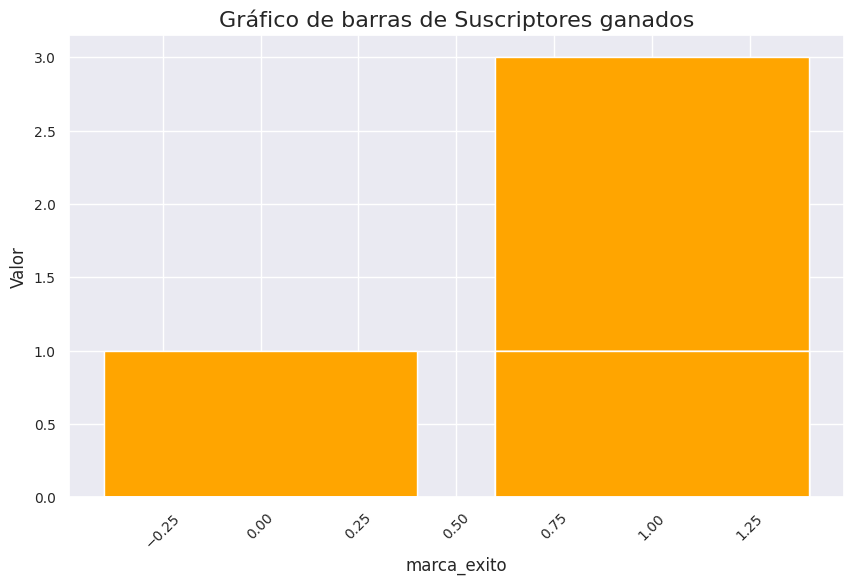

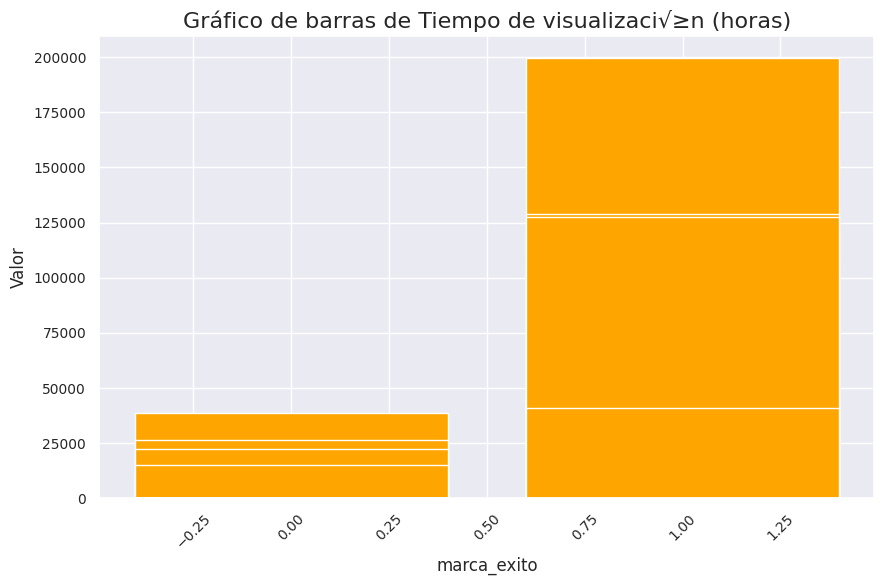

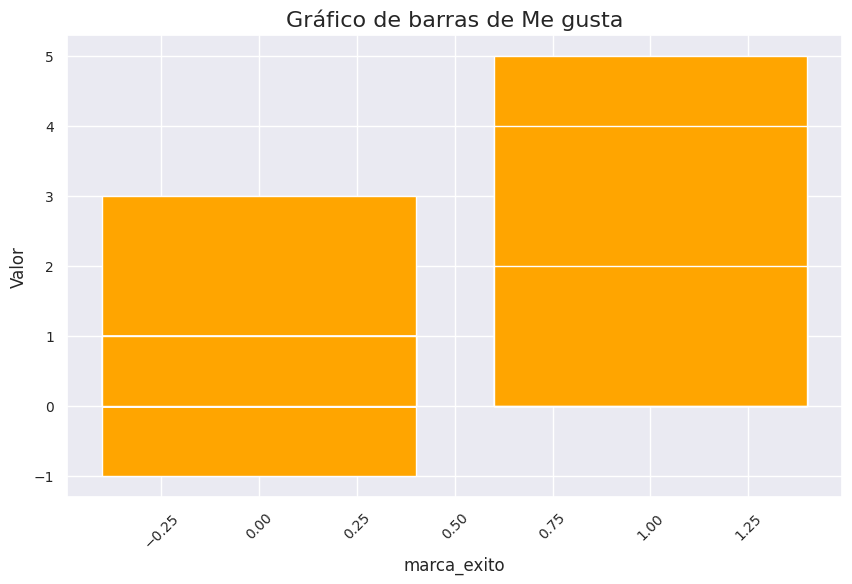

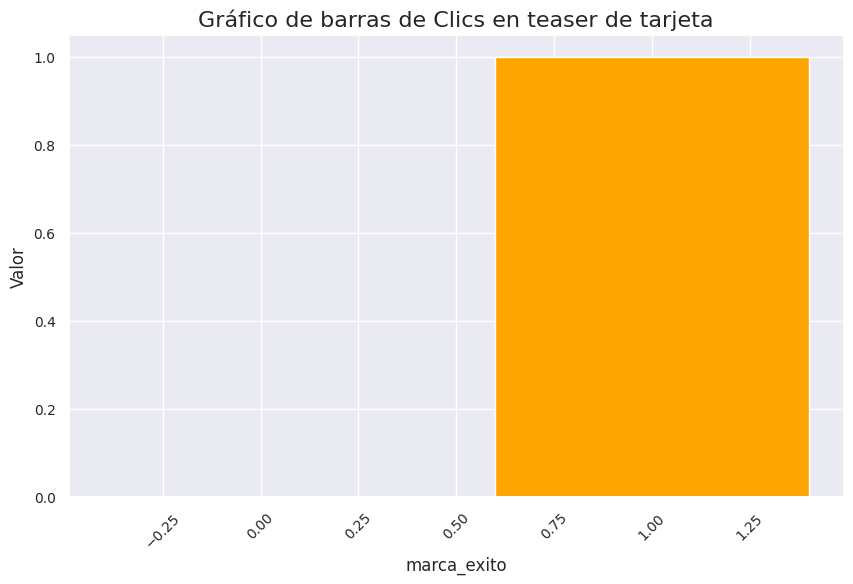

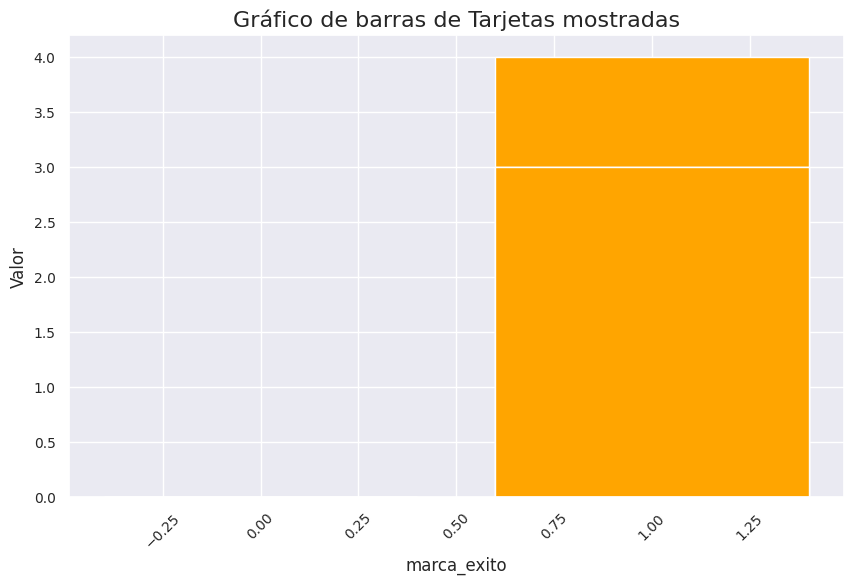

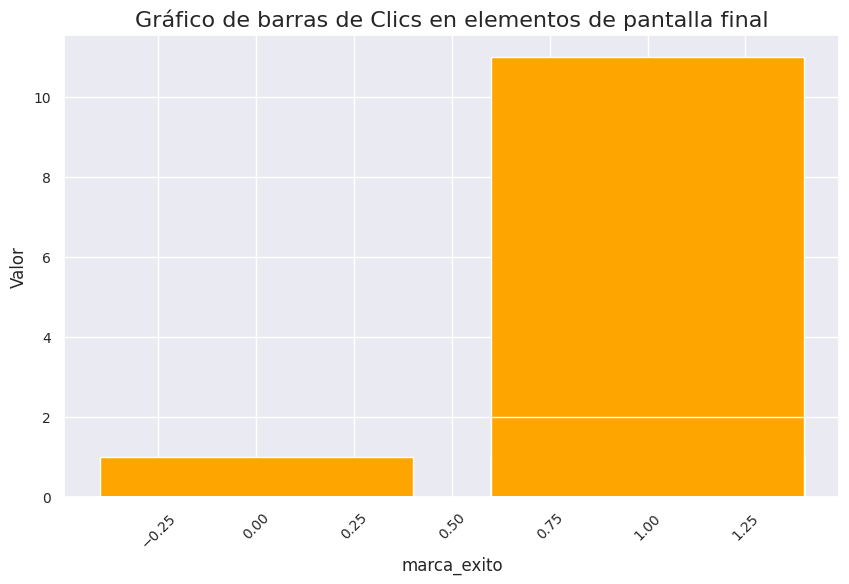

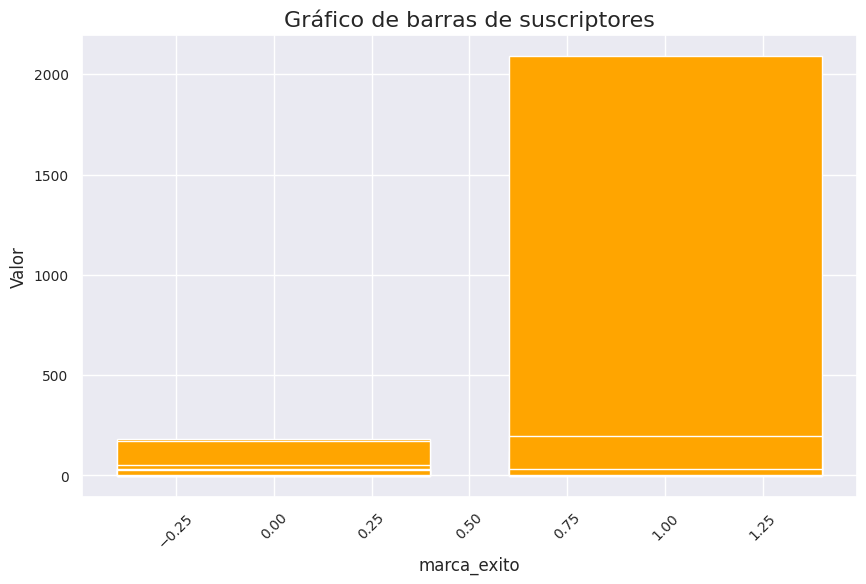

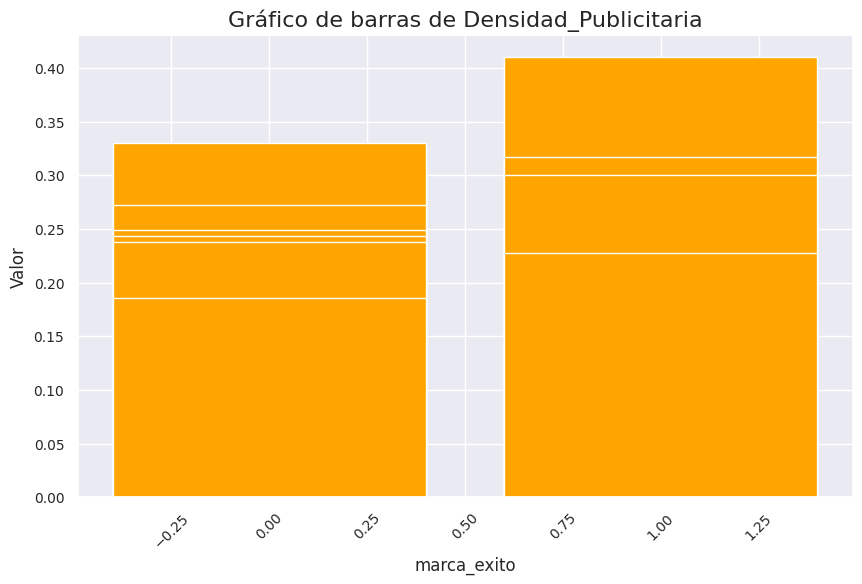

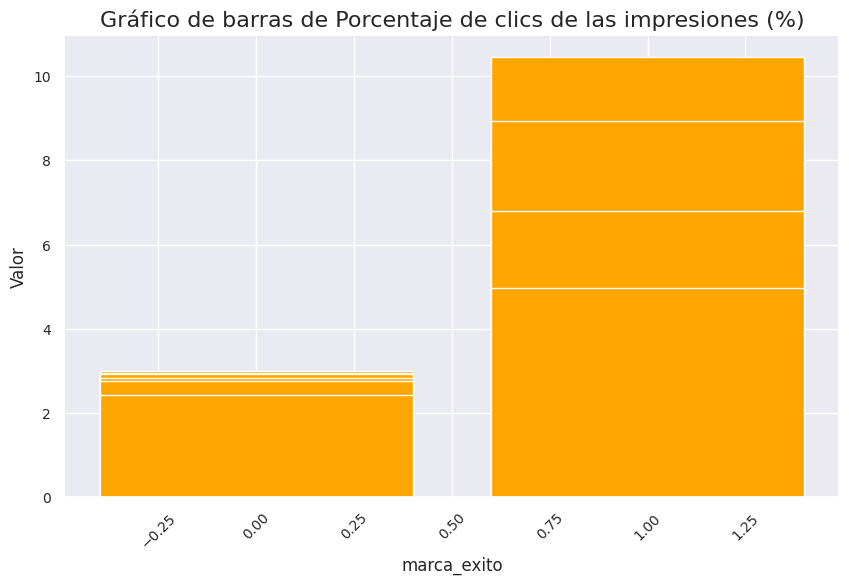

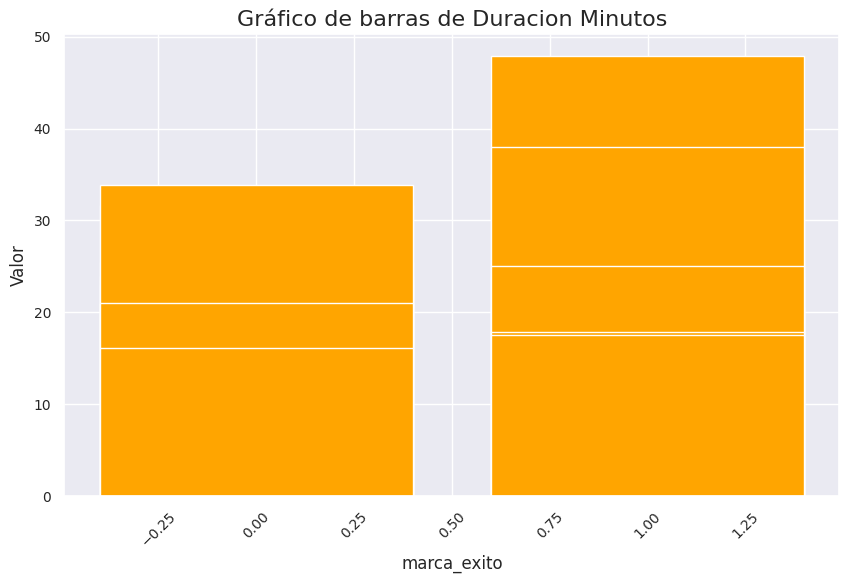

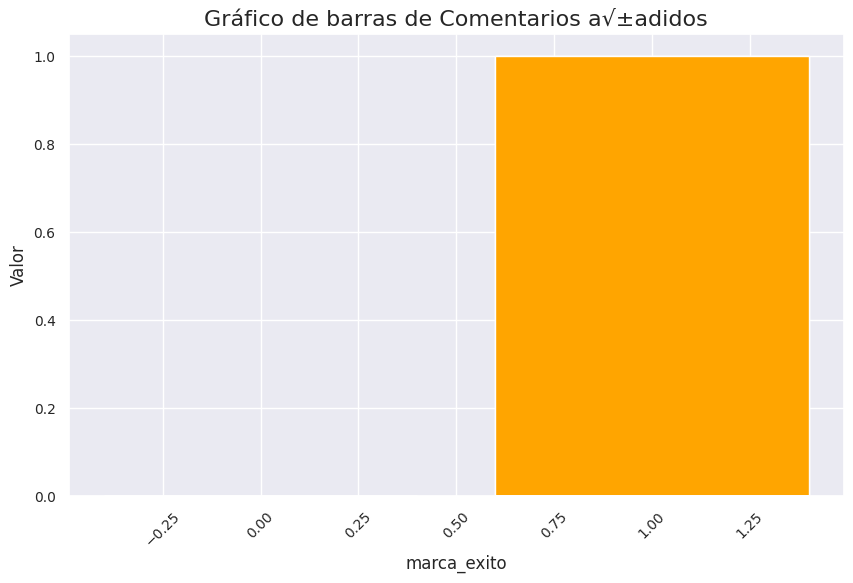

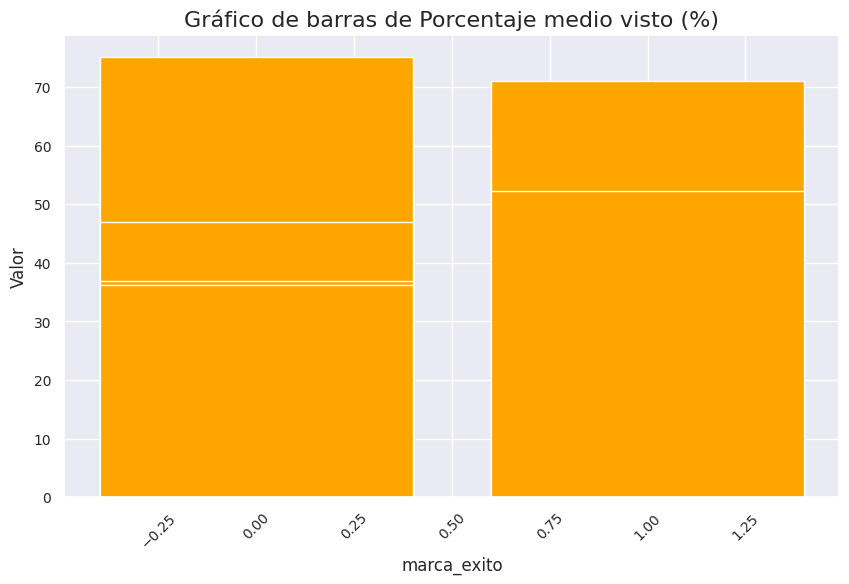

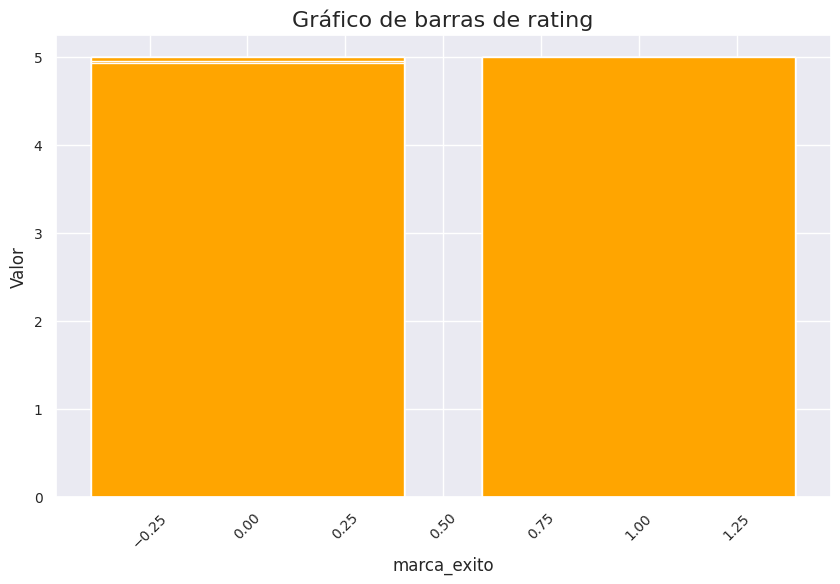

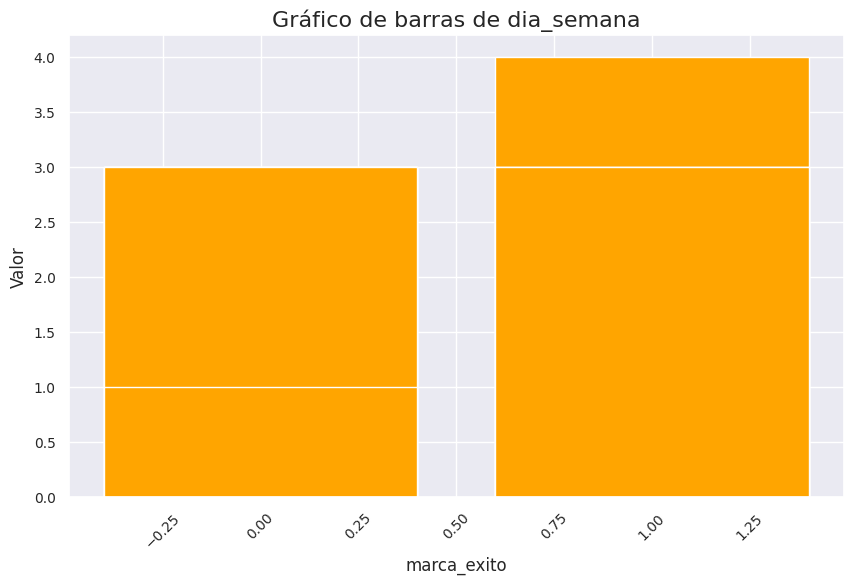

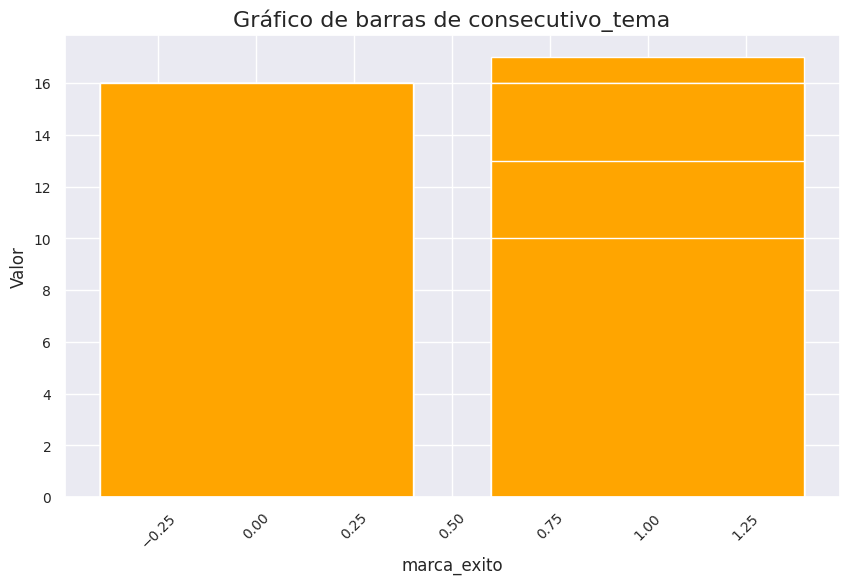

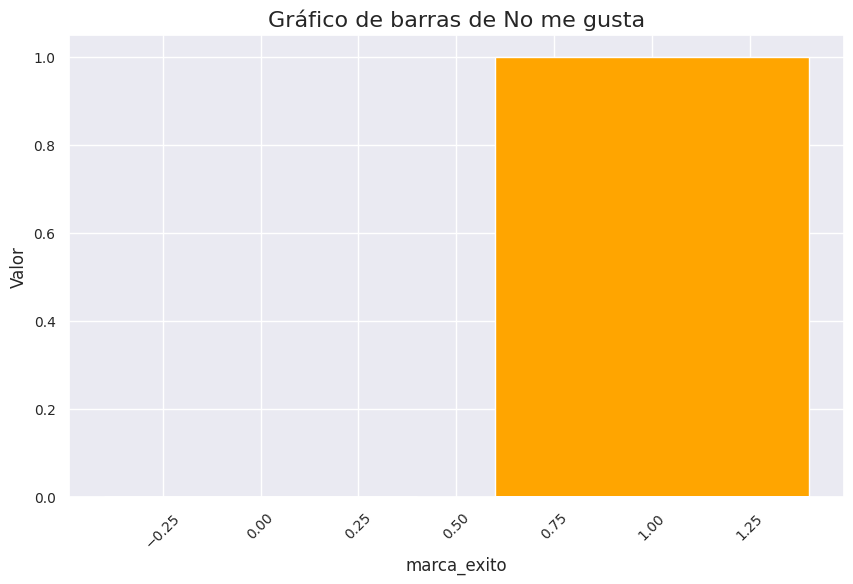

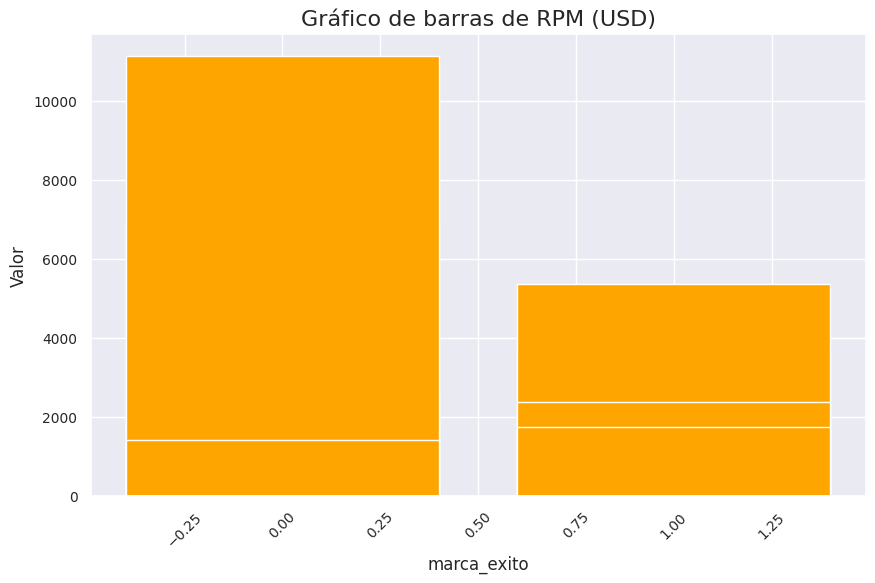

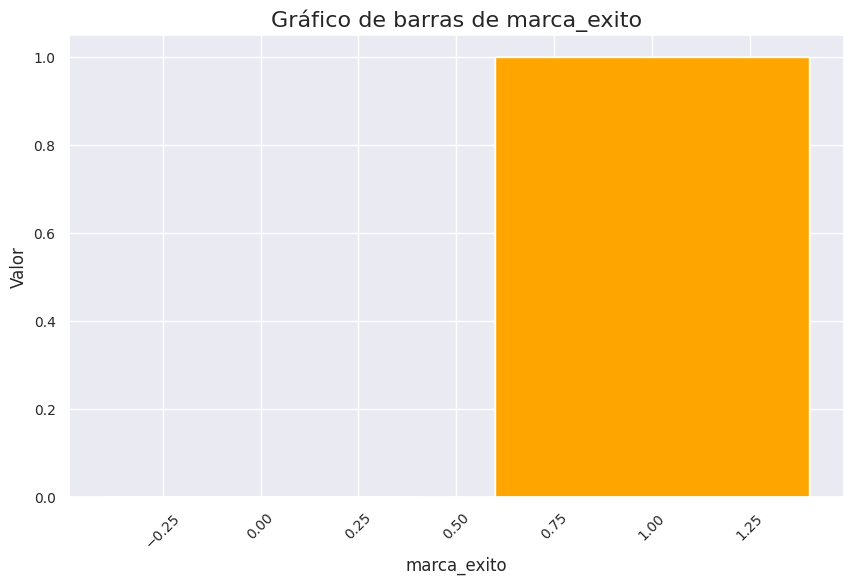

In [6]:
for column in df.columns:
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    plt.bar(df['marca_exito'], df[column], color='orange', width=0.8)  # Gráfico de barras con ancho de 0.8
    plt.title(f'Gráfico de barras de {column}', fontsize=16)  # Título de la figura
    plt.xlabel('marca_exito', fontsize=12)  # Etiqueta del eje x
    plt.ylabel('Valor', fontsize=12)  # Etiqueta del eje y
    plt.xticks(fontsize=10, rotation=45)  # Tamaño y rotación de los ticks del eje x
    plt.yticks(fontsize=10)  # Tamaño de los ticks del eje y
    plt.show()

## Histogramas agrupados

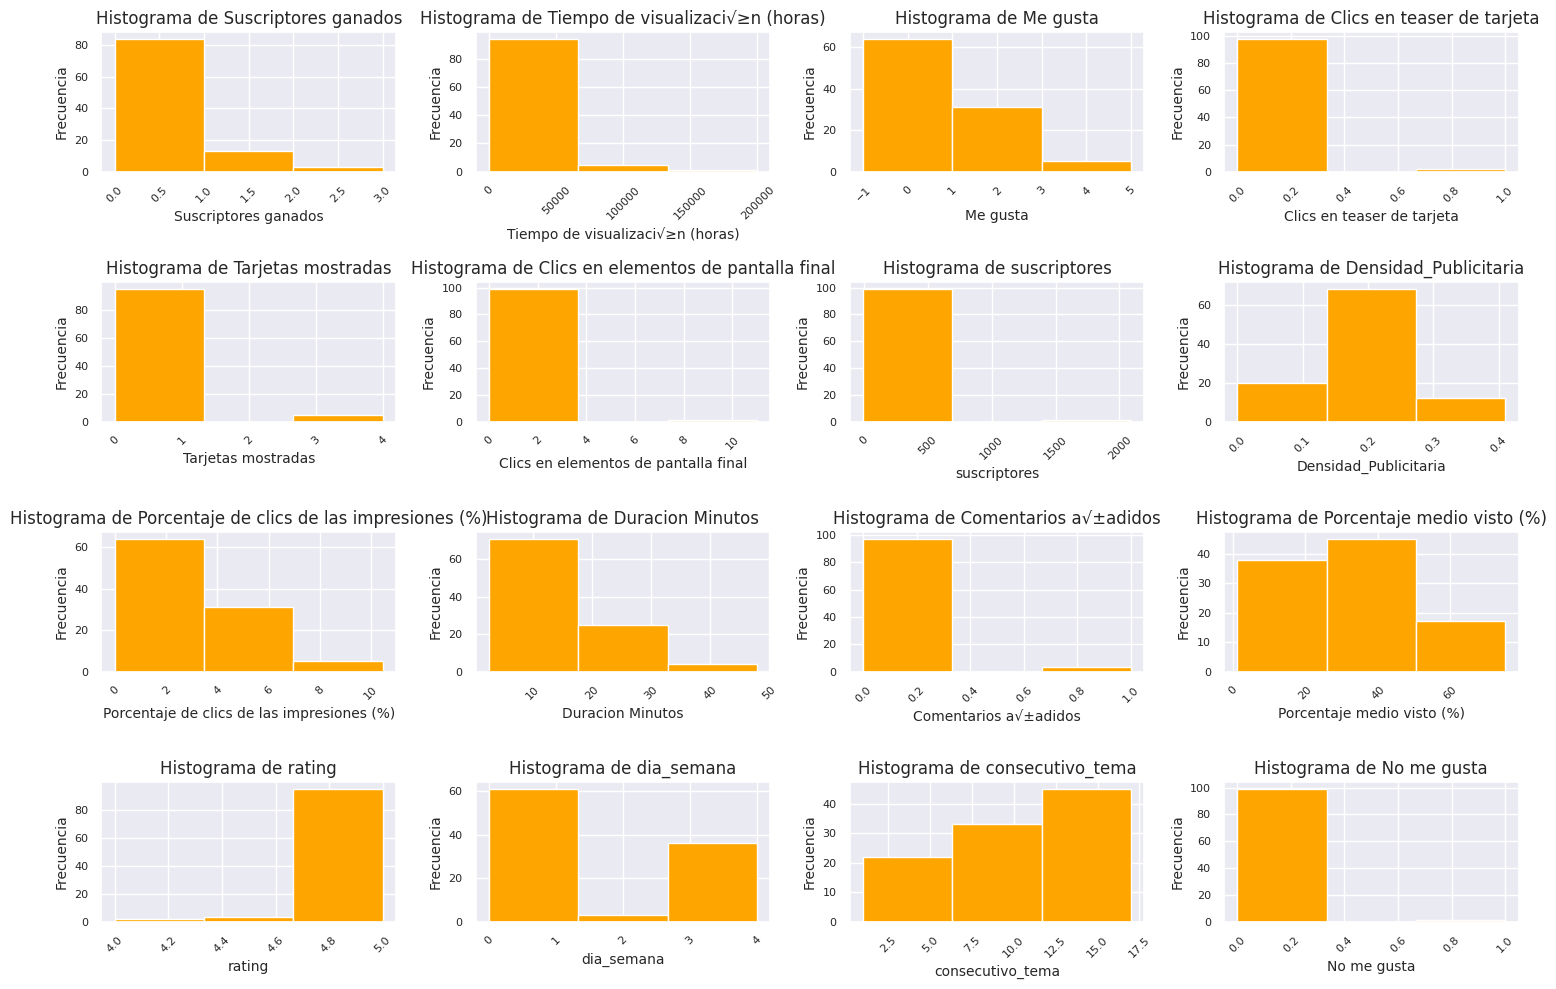

In [7]:
num_columns = min(4, len(df.columns)) 
num_rows = math.ceil(len(df.columns.drop(["marca_exito",'RPM (USD)'])) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

for i, column in enumerate(df.columns.drop(["marca_exito",'RPM (USD)'])):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    if column != 'RPM (USD)' or 'marca_exito':
        ax.hist(df[column], bins=3, color='orange')
        ax.set_title(f'Histograma de {column}', fontsize=12)
        ax.set_xlabel(column, fontsize=10)
        ax.set_ylabel('Frecuencia', fontsize=10)
        ax.tick_params(axis='x', labelrotation=45)
        ax.tick_params(axis='both', labelsize=8)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


## Histogramas individuales

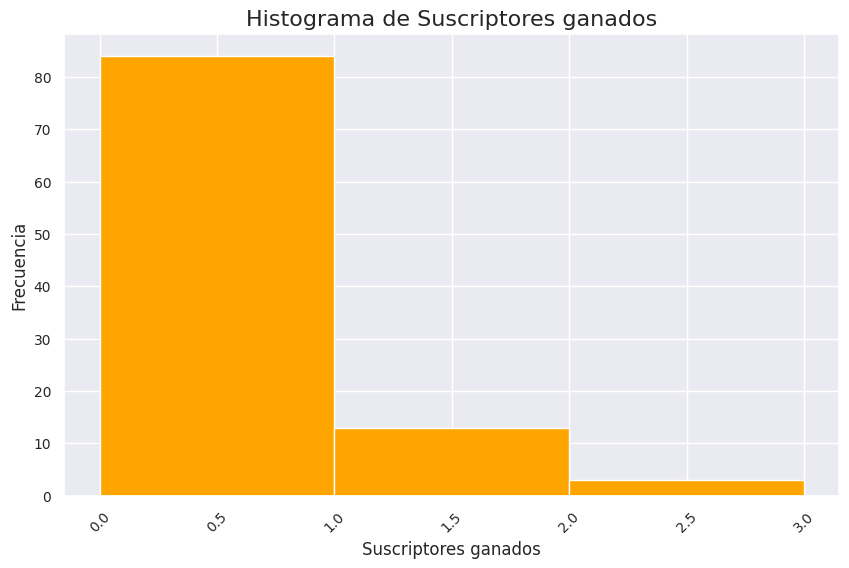

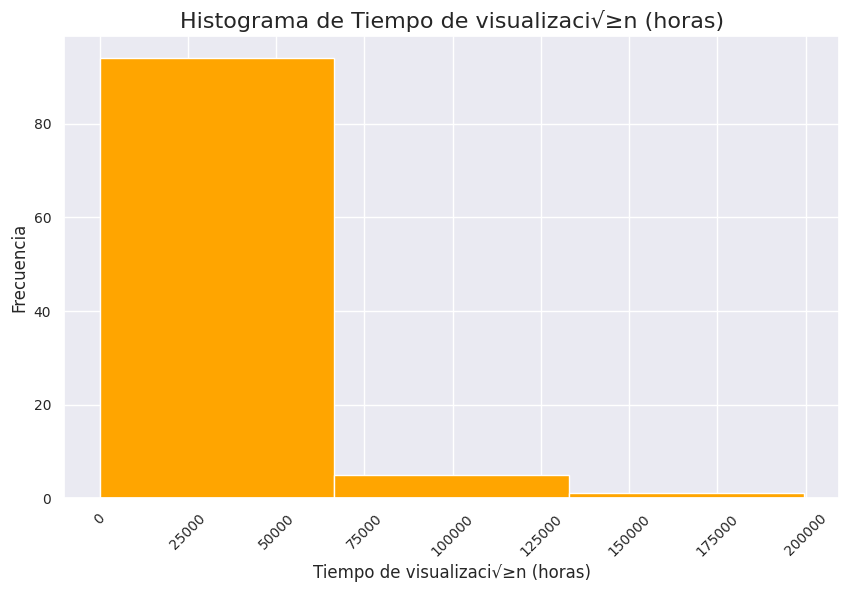

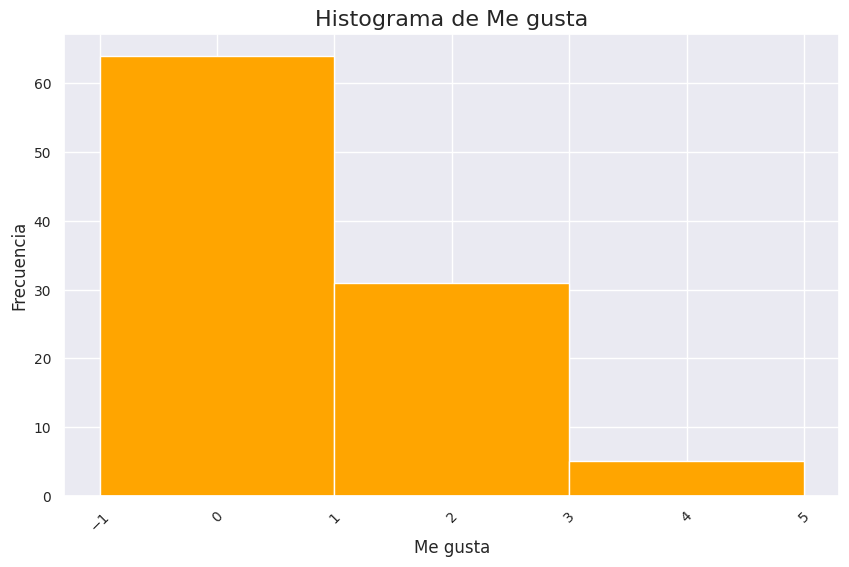

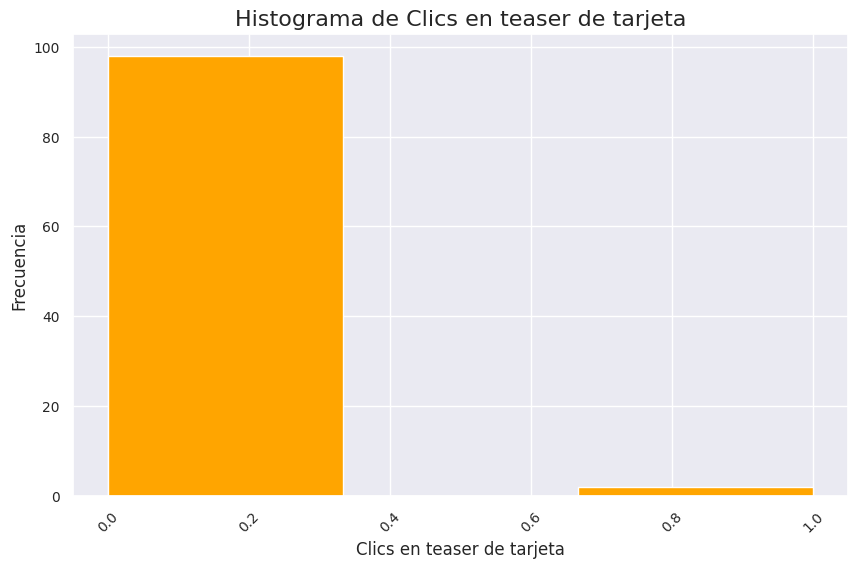

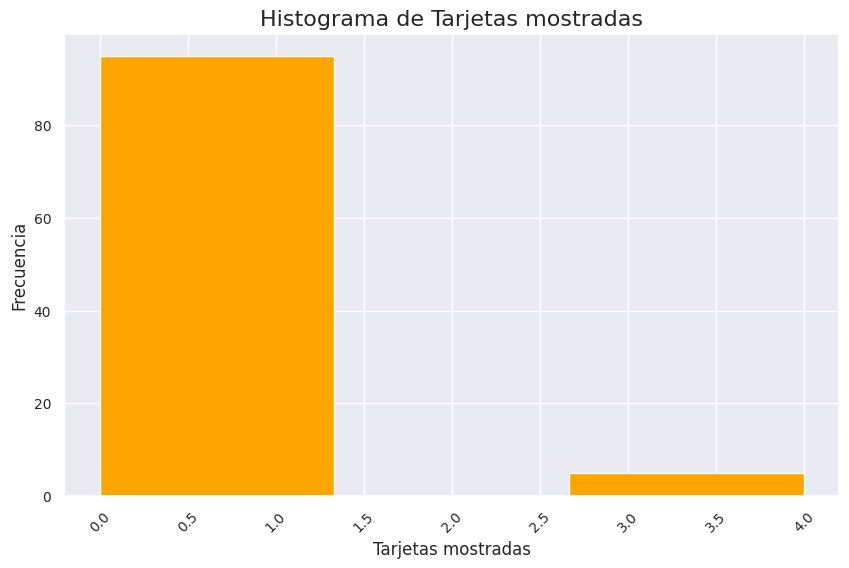

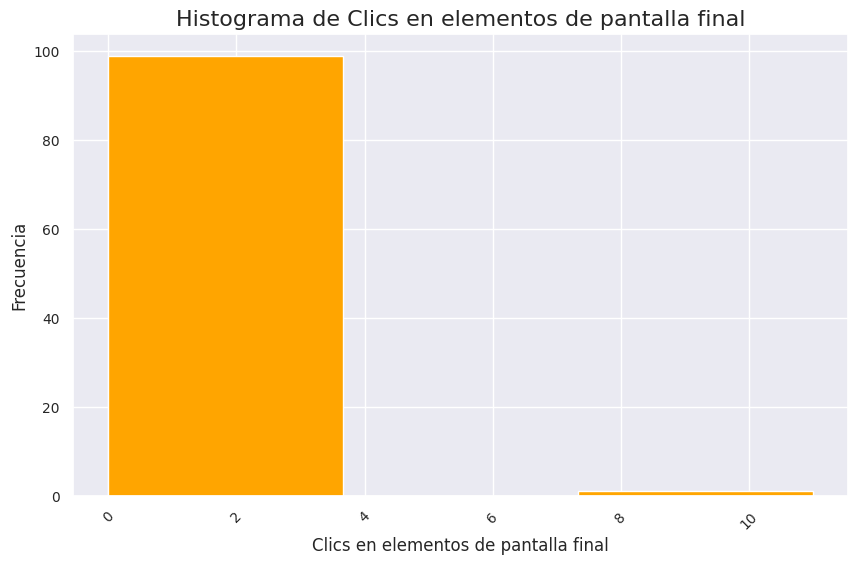

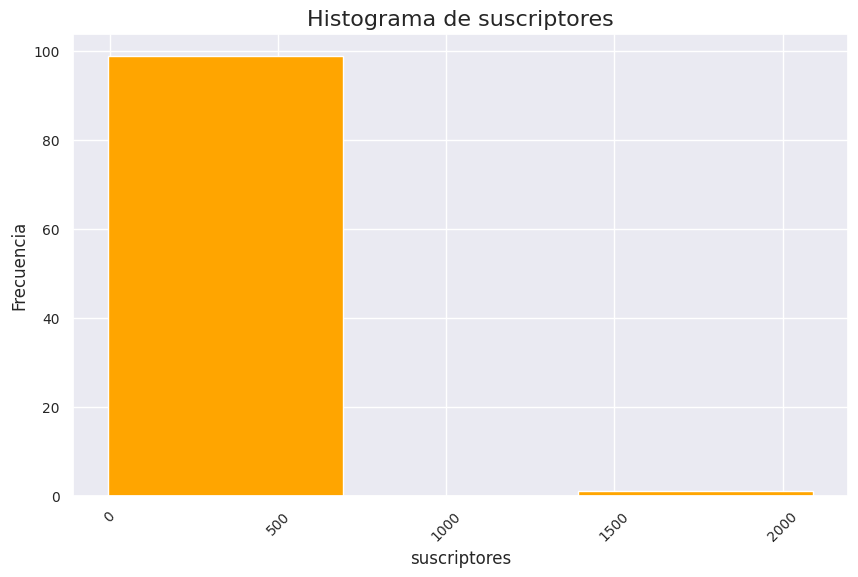

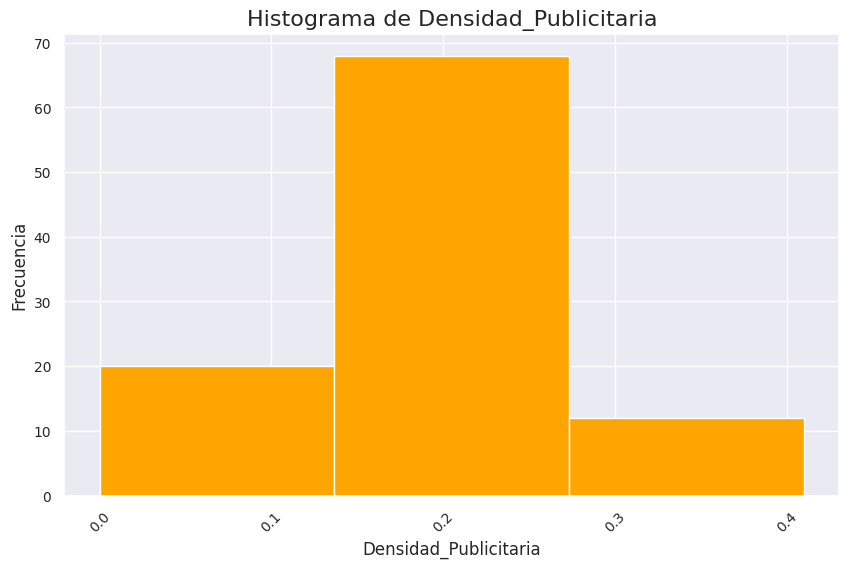

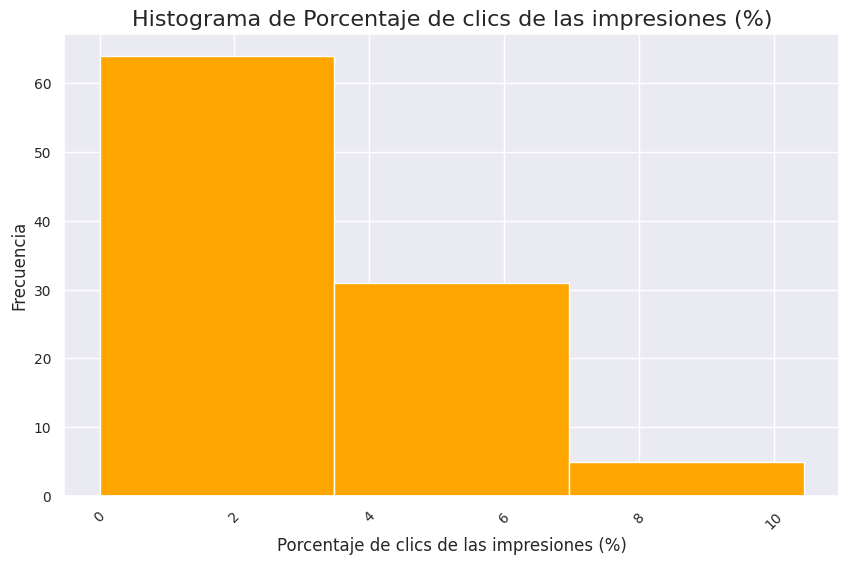

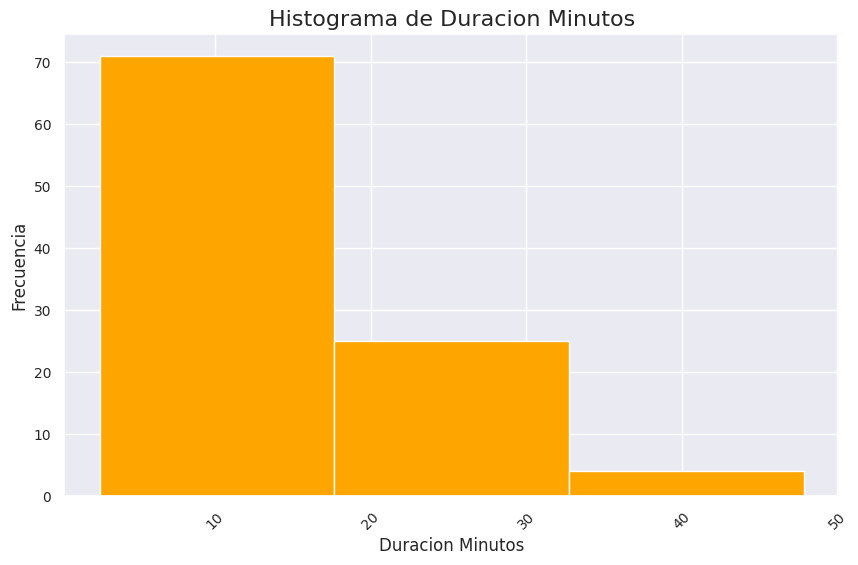

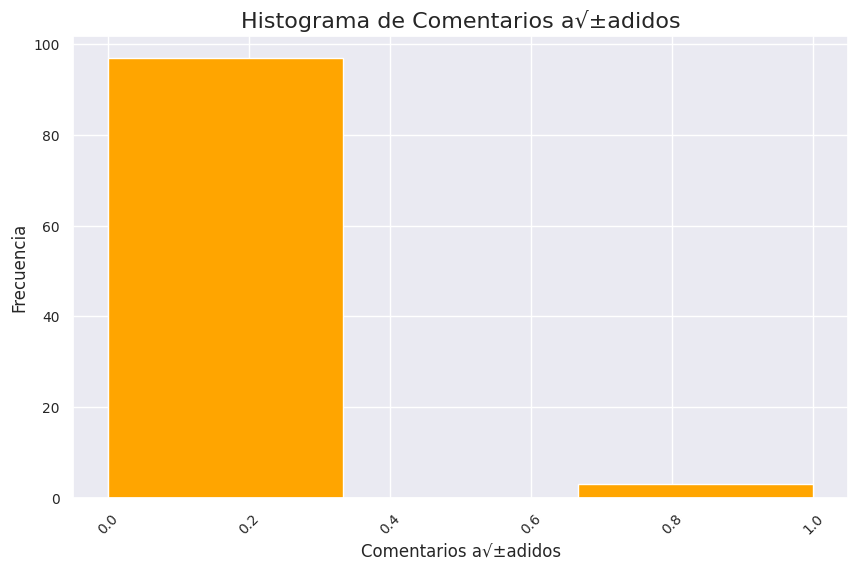

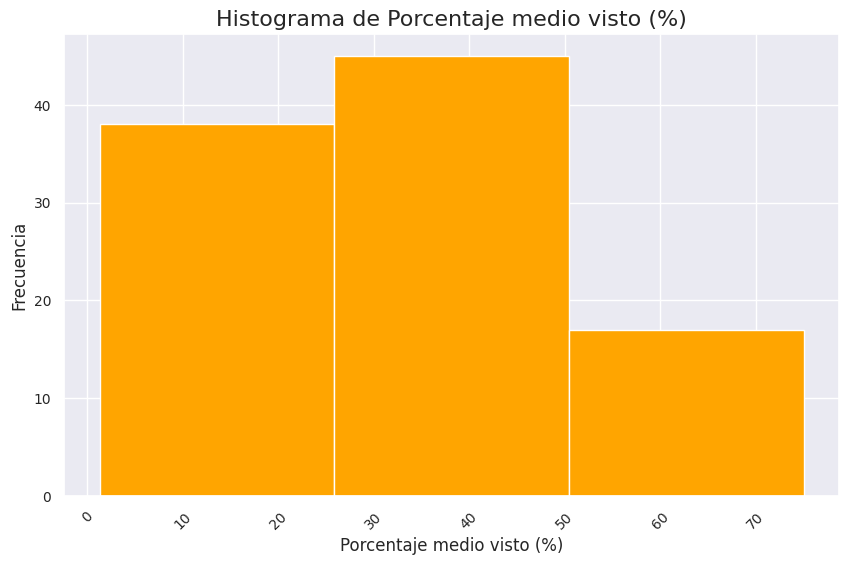

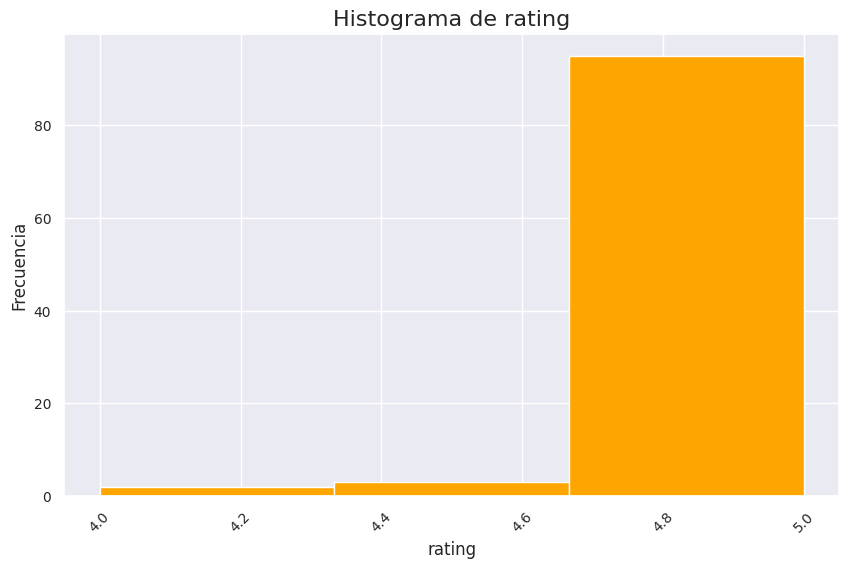

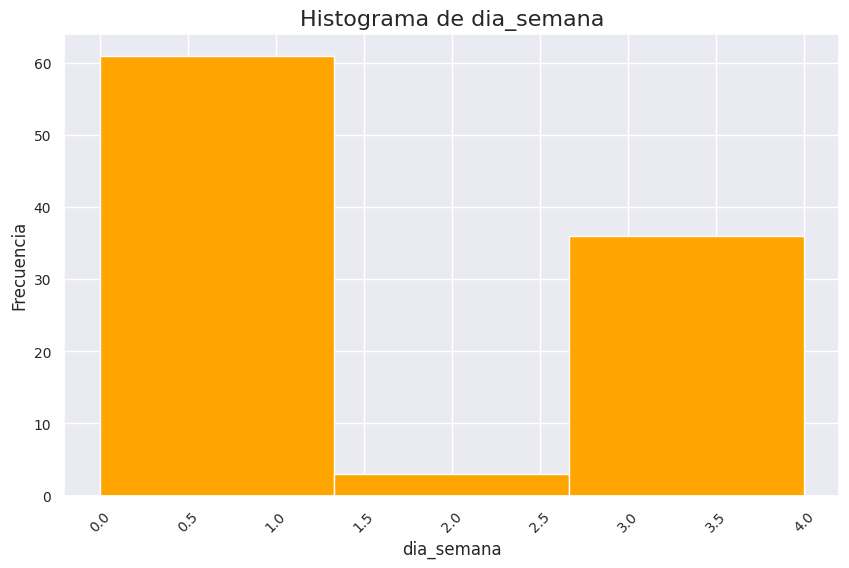

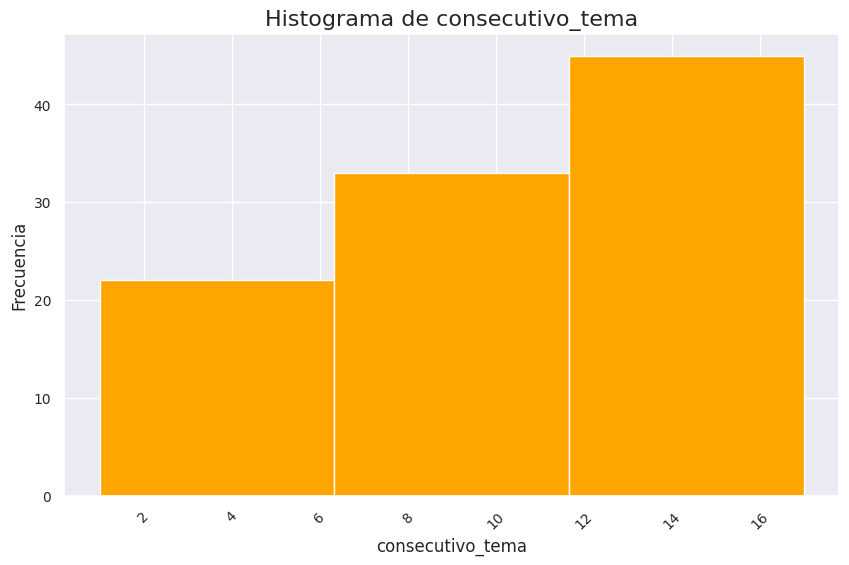

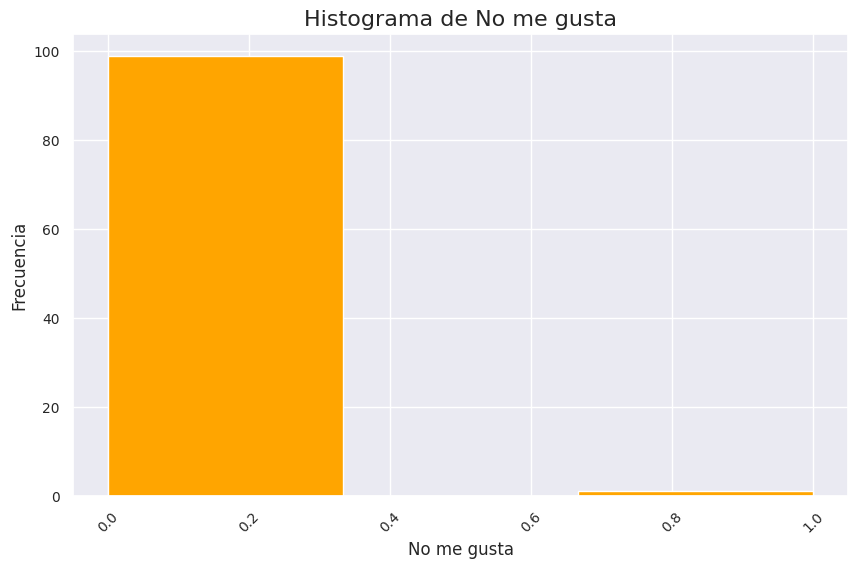

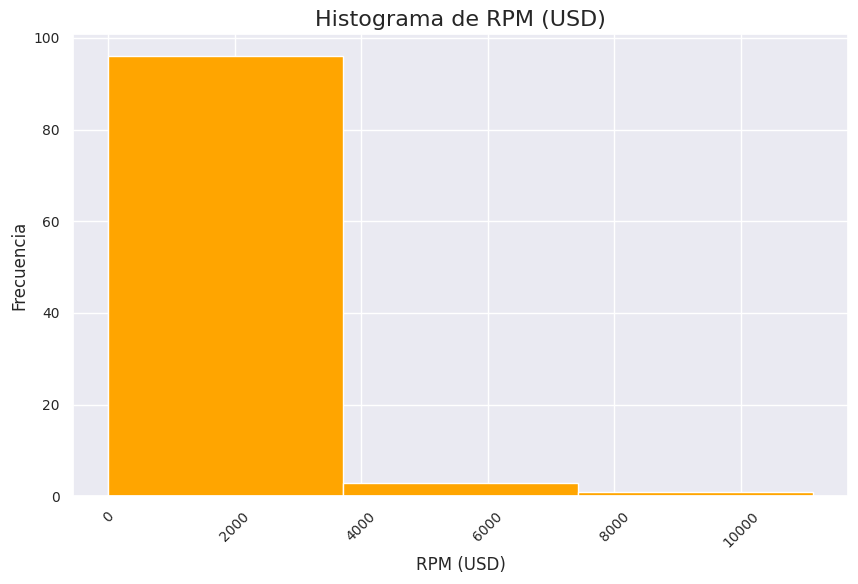

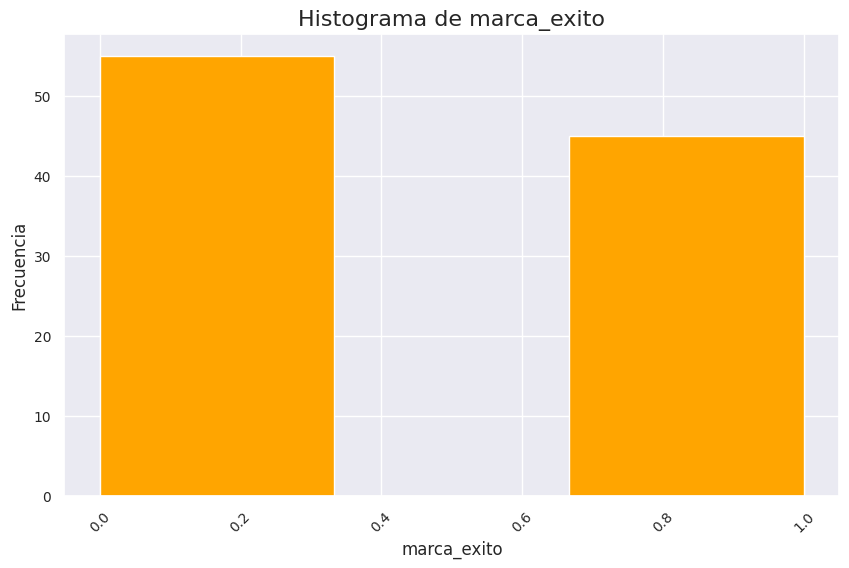

In [8]:
for column in df.columns:
    if column != 'rpm (USD)':
        plt.figure(figsize=(10, 6))  # Tamaño de la figura
        plt.hist(df[column], bins=3, color='orange')  # Histograma con 3 bins
        plt.title(f'Histograma de {column}', fontsize=16)  # Título de la figura
        plt.xlabel(column, fontsize=12)  # Etiqueta del eje x
        plt.ylabel('Frecuencia', fontsize=12)  # Etiqueta del eje y
        plt.xticks(fontsize=10, rotation=45)  # Tamaño y rotación de los ticks del eje x
        plt.yticks(fontsize=10)  # Tamaño de los ticks del eje y
        plt.show()


## Boxplot cada variable

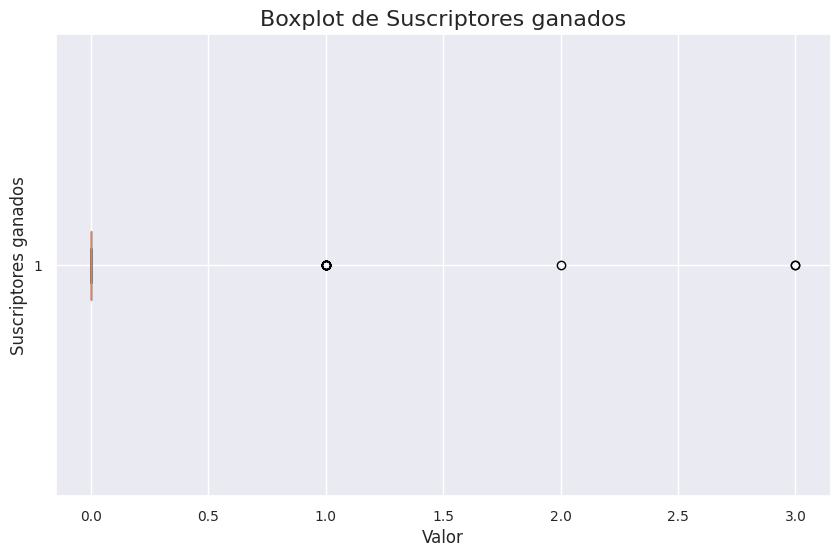

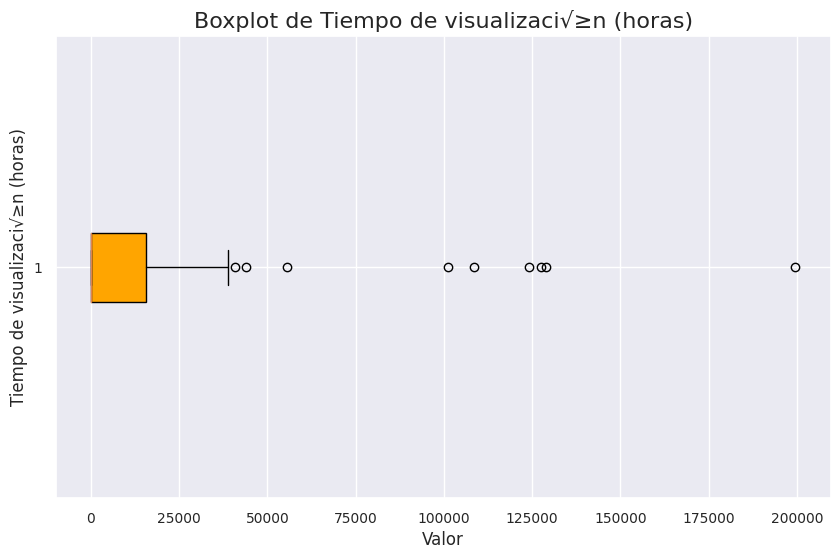

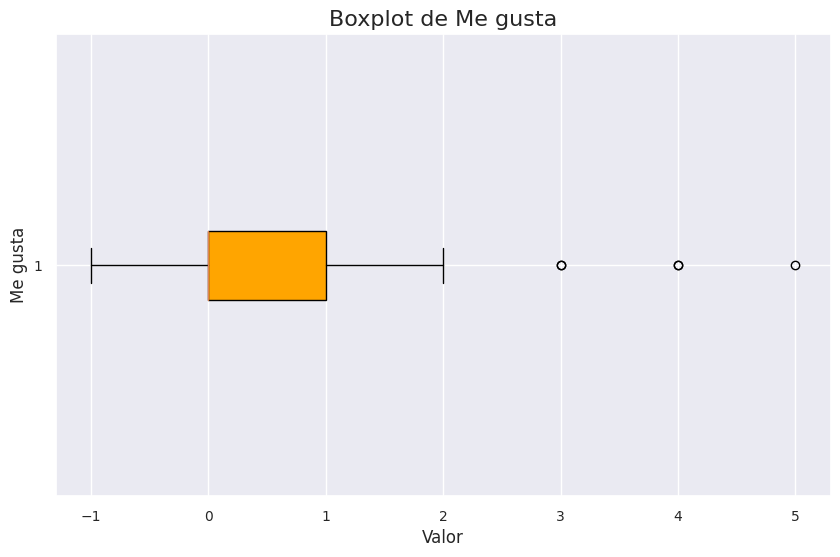

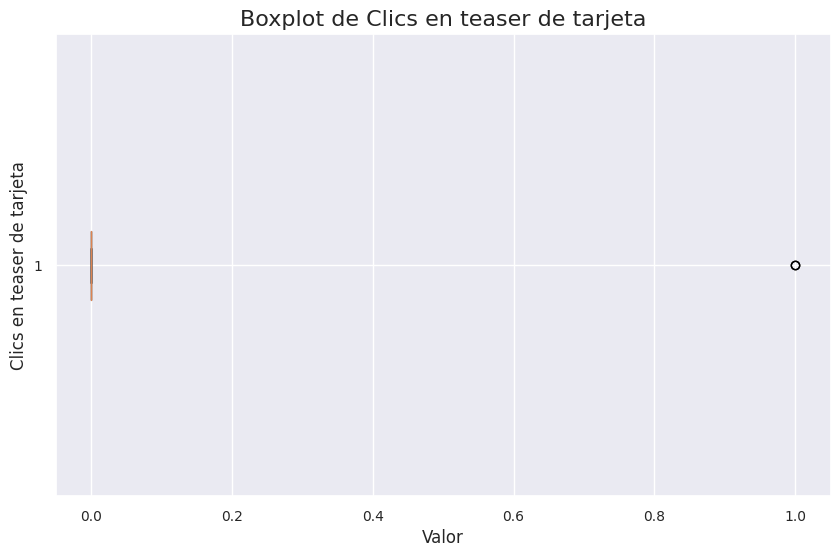

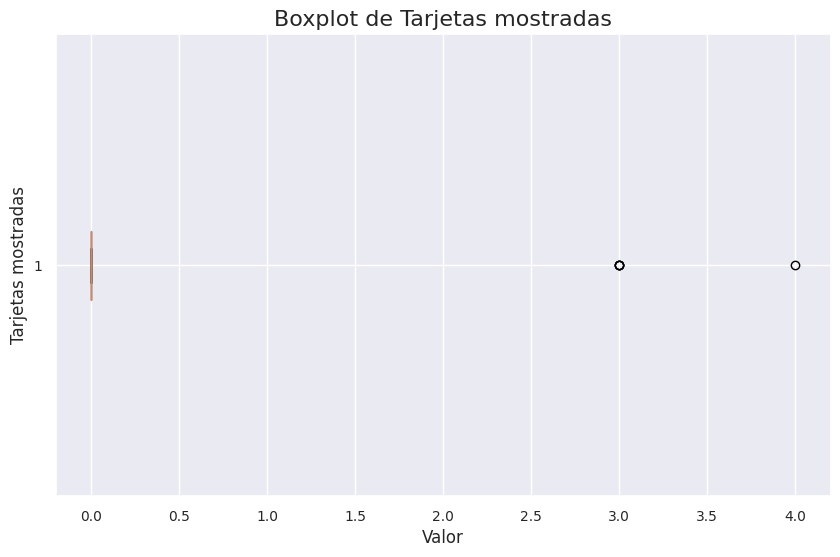

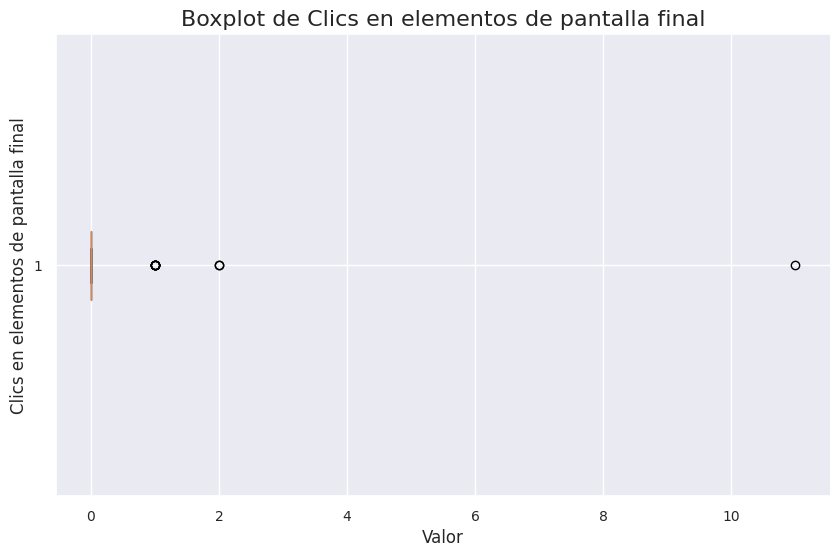

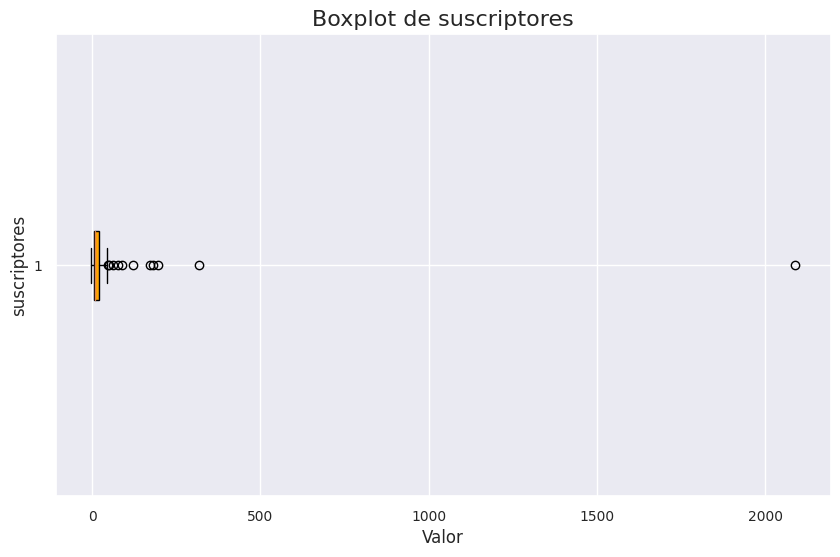

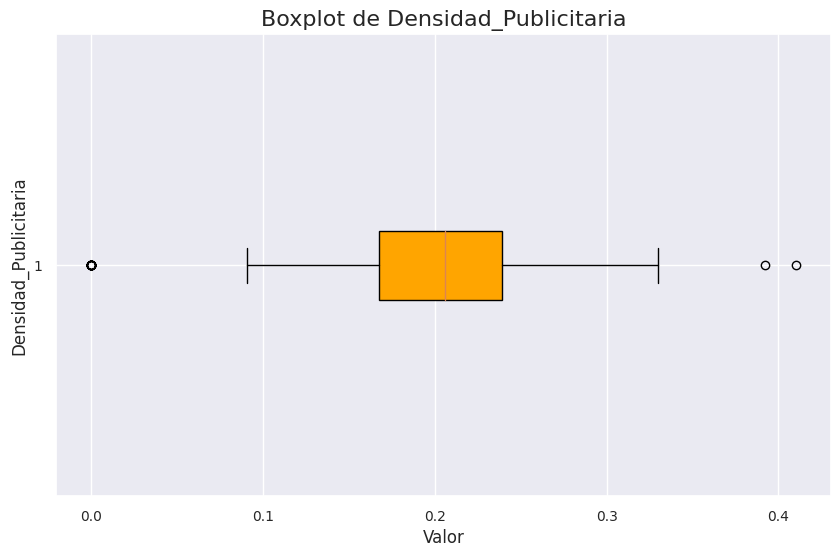

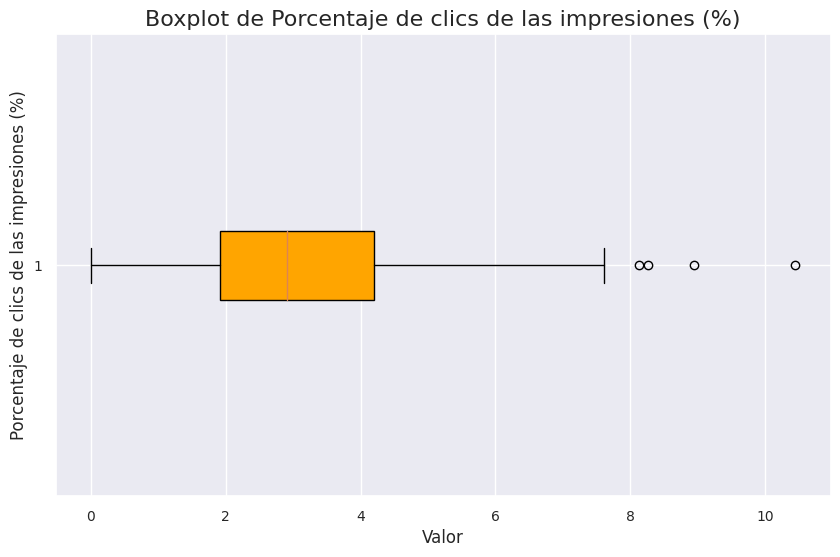

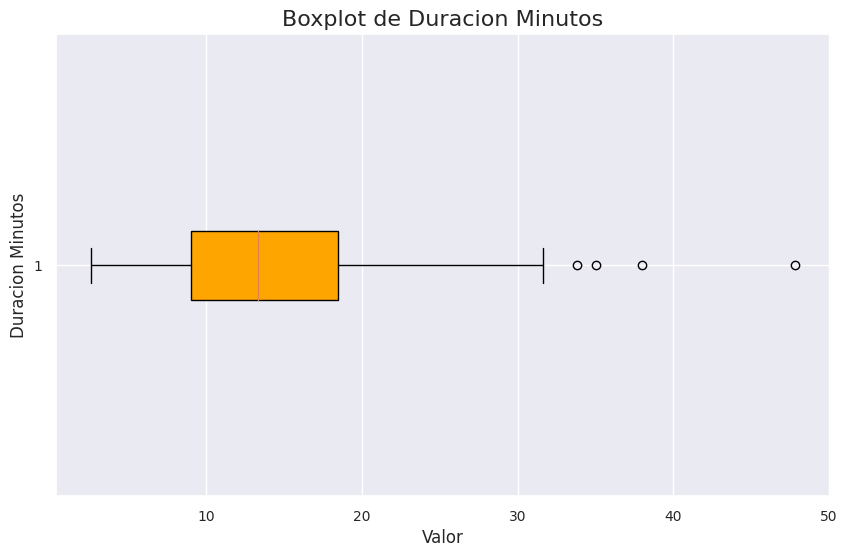

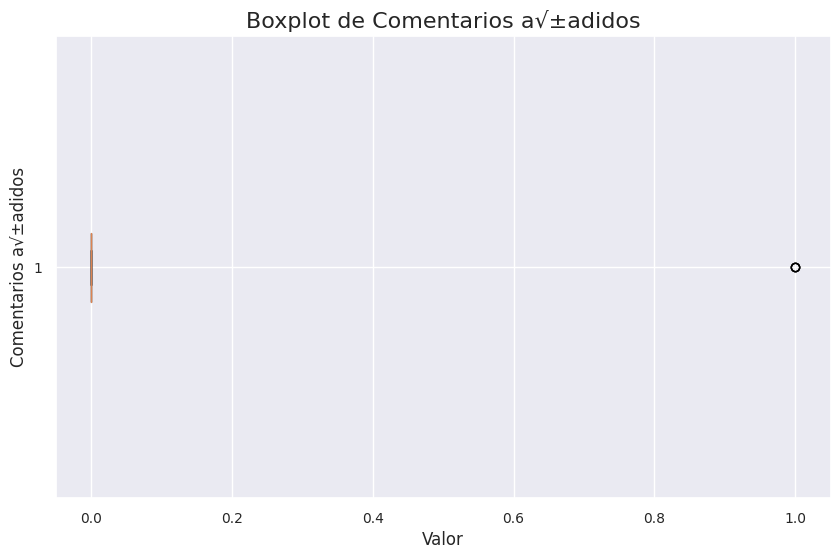

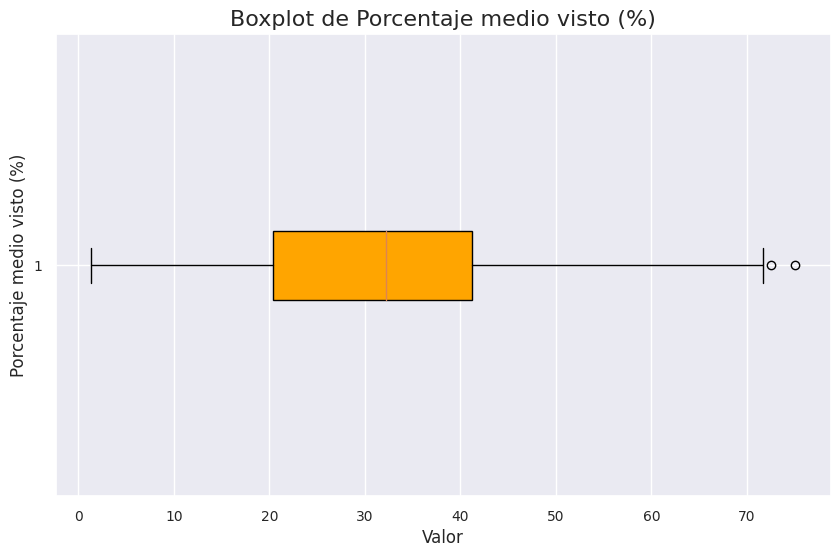

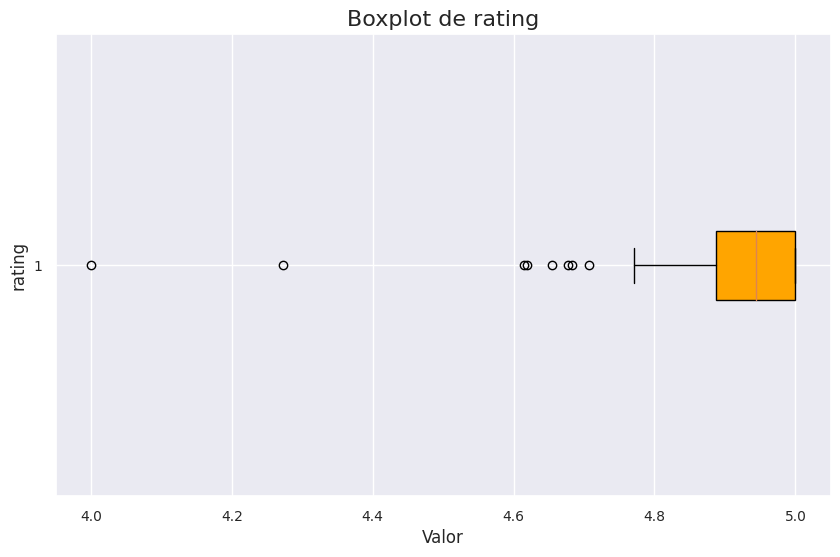

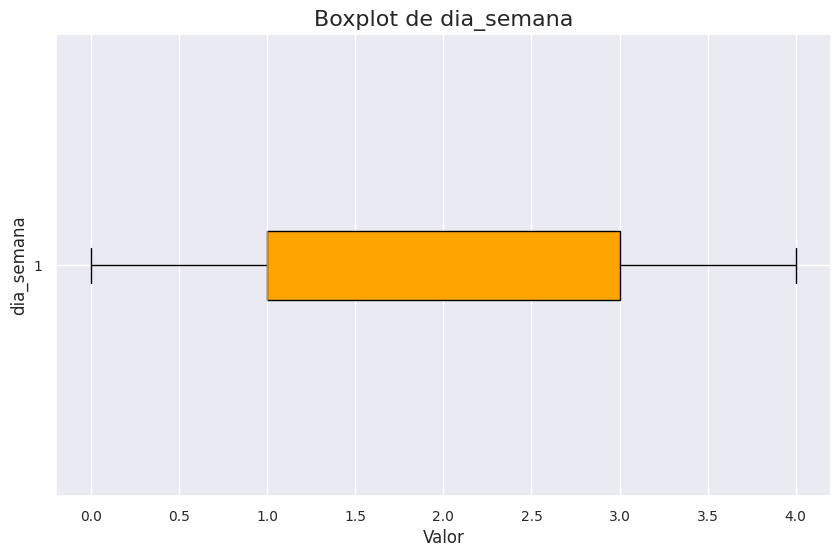

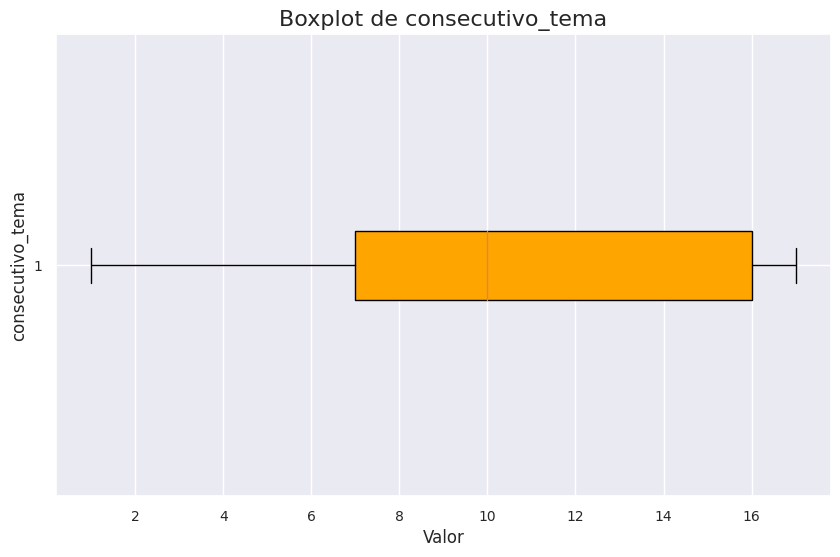

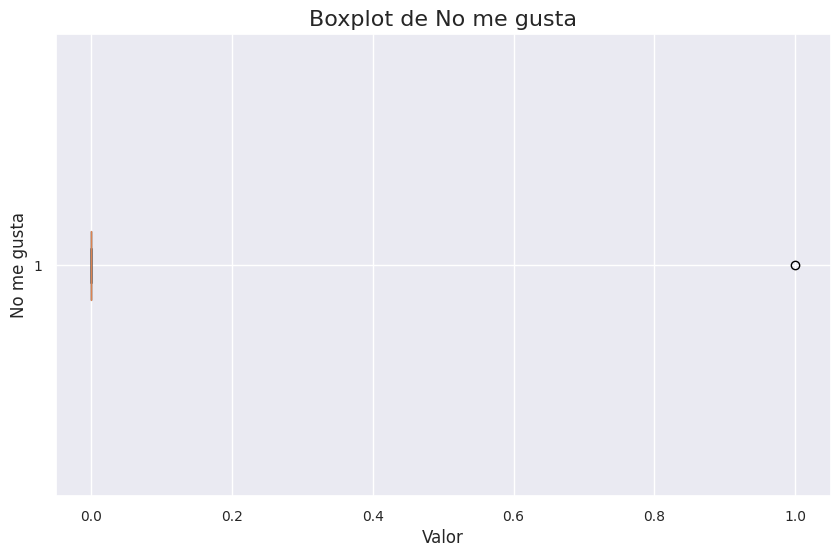

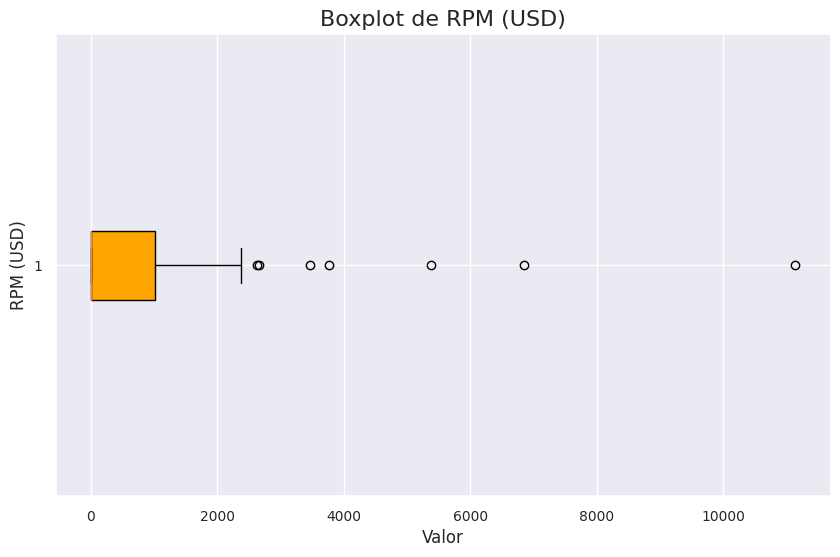

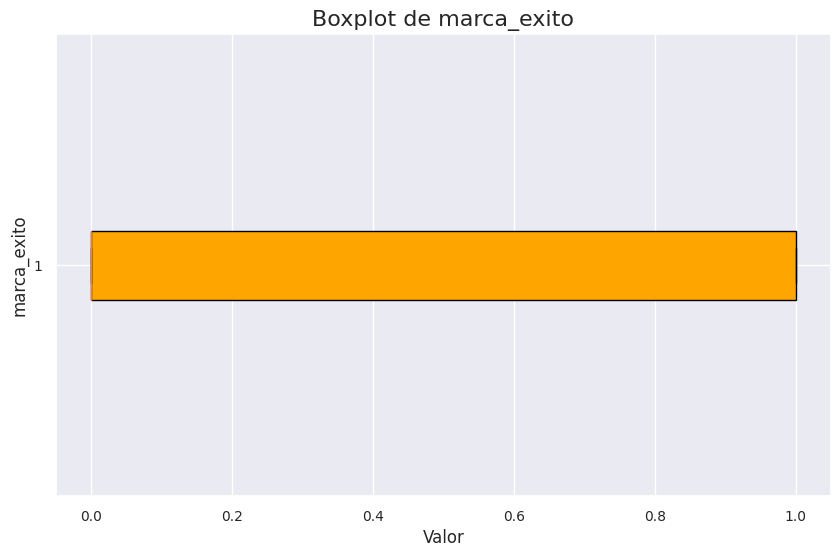

In [9]:
for column in df.columns:
    plt.figure(figsize=(10, 6))  # Tamaño de la figura

    # Generar boxplot horizontal para la variable actual
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops={'facecolor': 'orange'})
    plt.title(f'Boxplot de {column}', fontsize=16)  # Título de la figura
    plt.xlabel('Valor', fontsize=12)  # Etiqueta del eje x
    plt.ylabel(column, fontsize=12)  # Etiqueta del eje y
    plt.xticks(fontsize=10)  # Tamaño de los ticks del eje x
    plt.yticks(fontsize=10)  # Tamaño de los ticks del eje y

    plt.show()

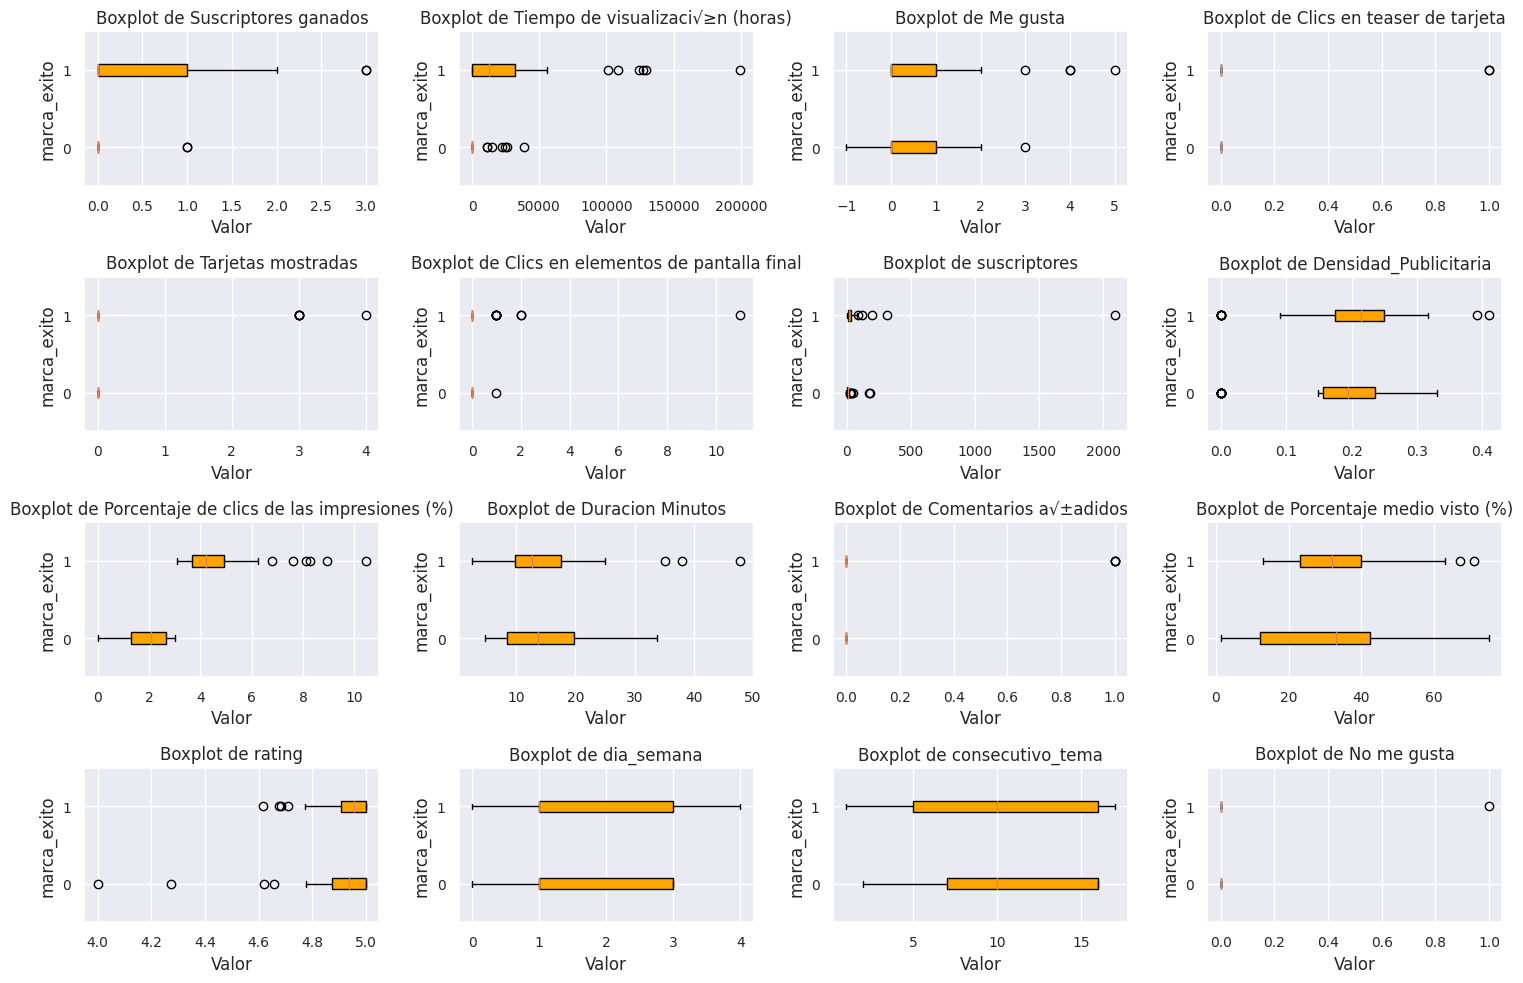

In [12]:
# Agrupar los datos por 'marca_exito'
groups = df.groupby('marca_exito')
num_columns = min(4, len(df.columns)) 
num_rows = math.ceil(len(df.columns.drop(["marca_exito",'RPM (USD)'])) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10), facecolor='white')

for i, column in enumerate(df.columns.drop(["marca_exito", "RPM (USD)"])):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    boxprops = {'facecolor': 'orange'}  # Color naranja para las cajas
    # Generar los box plots horizontales para cada grupo
    ax.boxplot([group[column] for _, group in groups], vert=False, patch_artist=True, boxprops=boxprops)
    ax.set_title(f'Boxplot de {column}', fontsize=12)  # Título de la figura
    ax.set_xlabel('Valor', fontsize=12)  # Etiqueta del eje x
    ax.set_ylabel('marca_exito', fontsize=12)  # Etiqueta del eje y
    ax.set_yticks(range(1, len(groups) + 1))
    ax.set_yticklabels(groups.groups.keys(), fontsize=10)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


## Boxplot por marca éxito

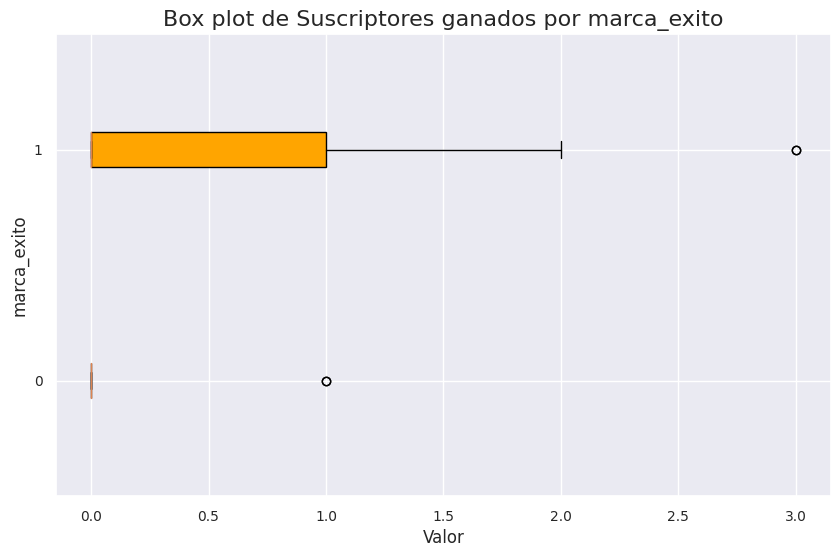

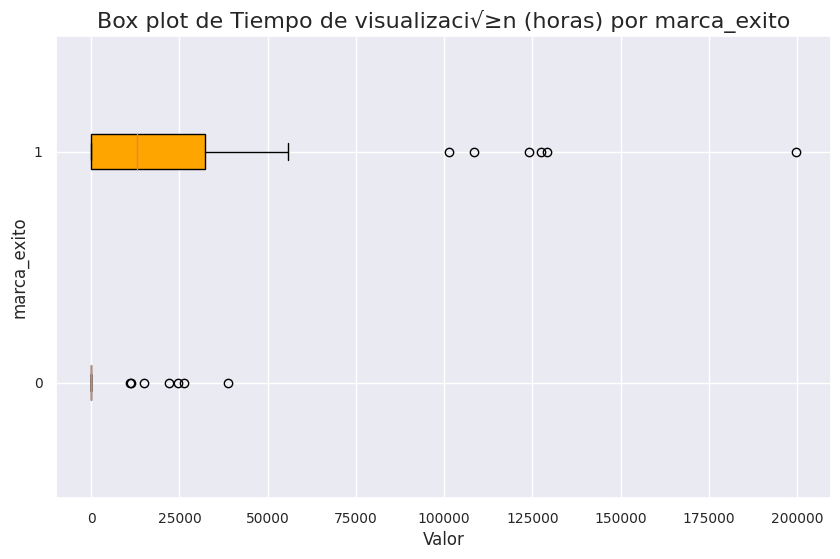

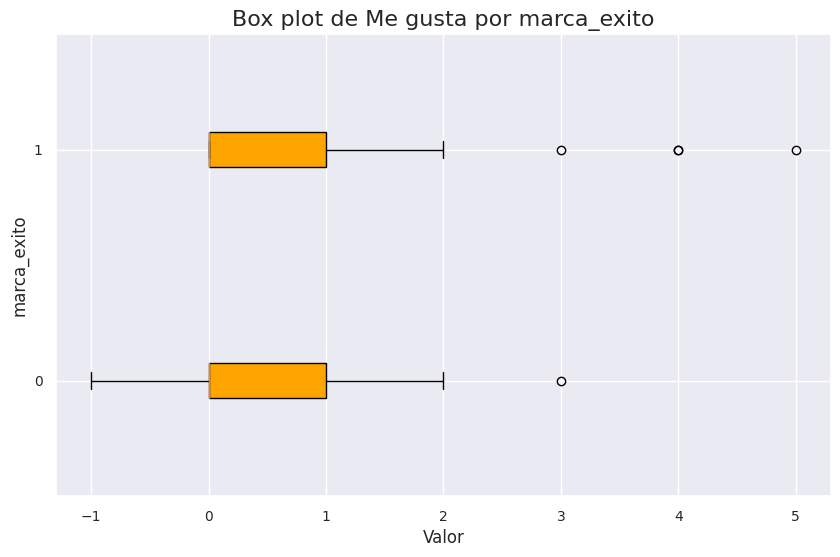

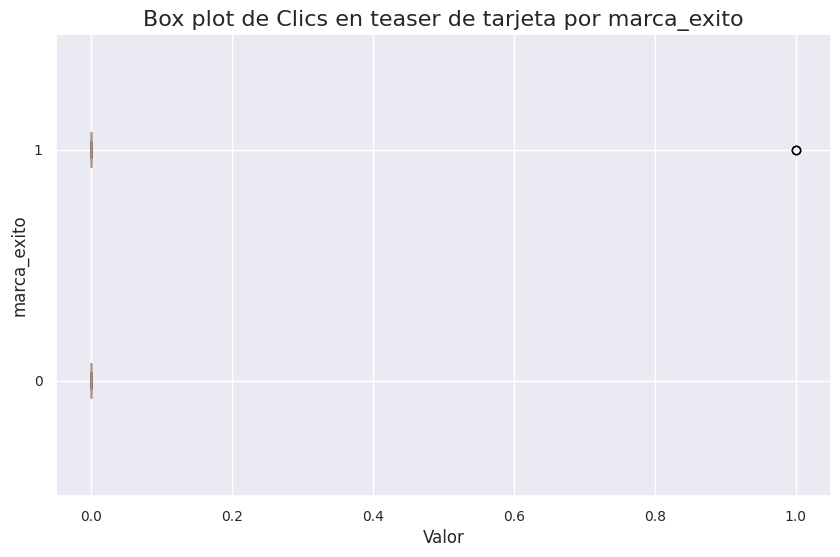

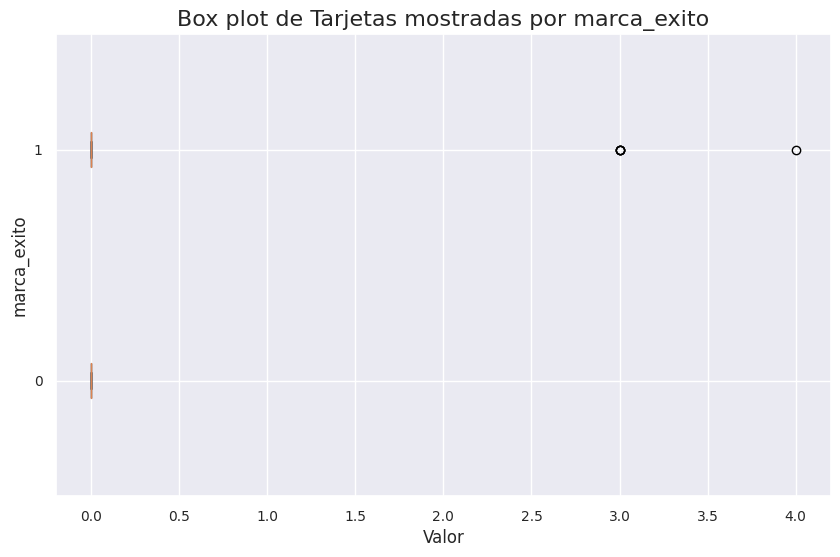

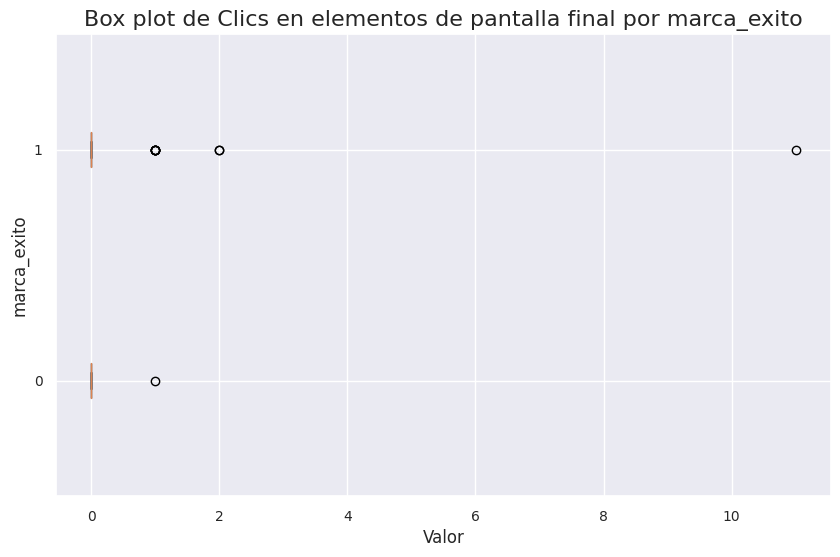

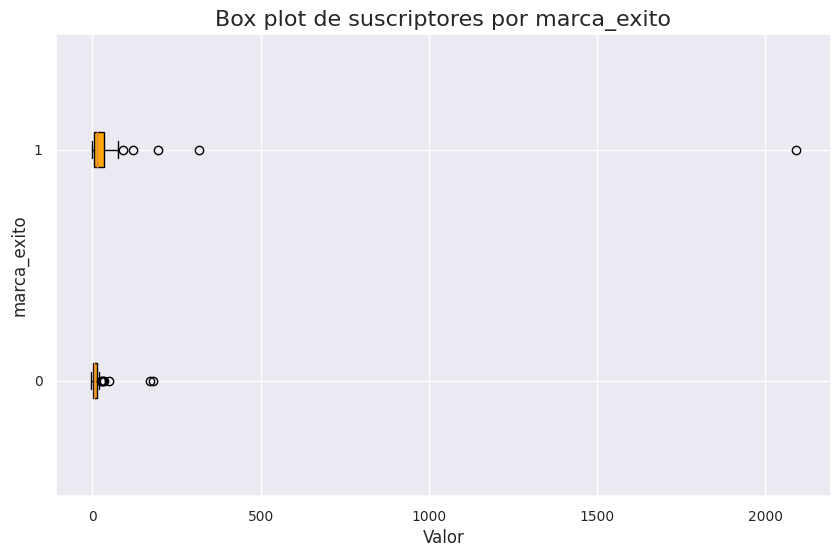

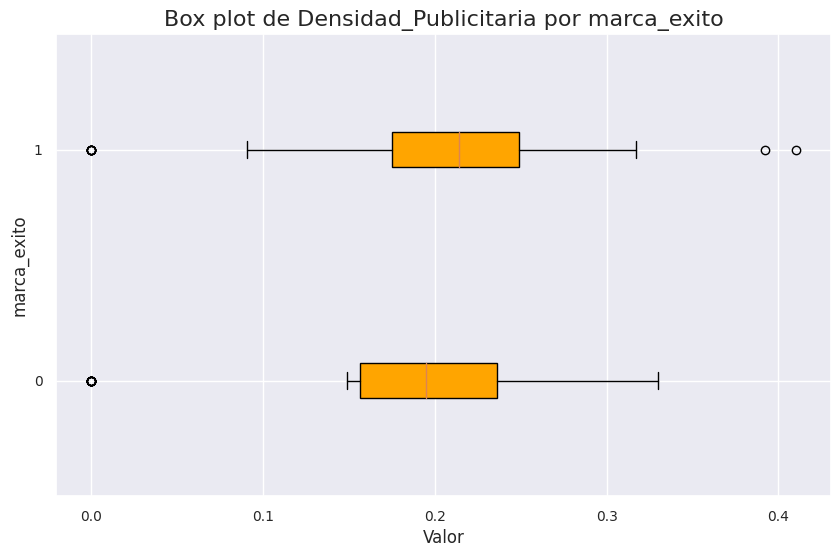

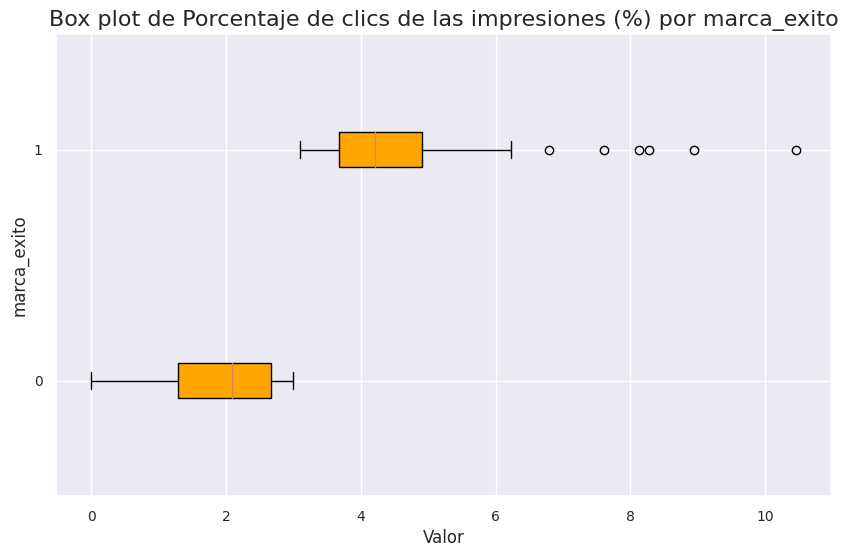

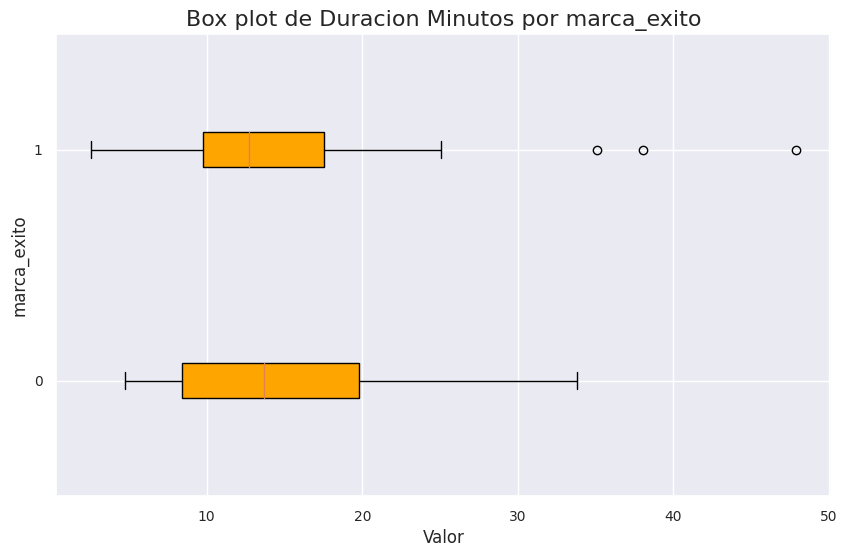

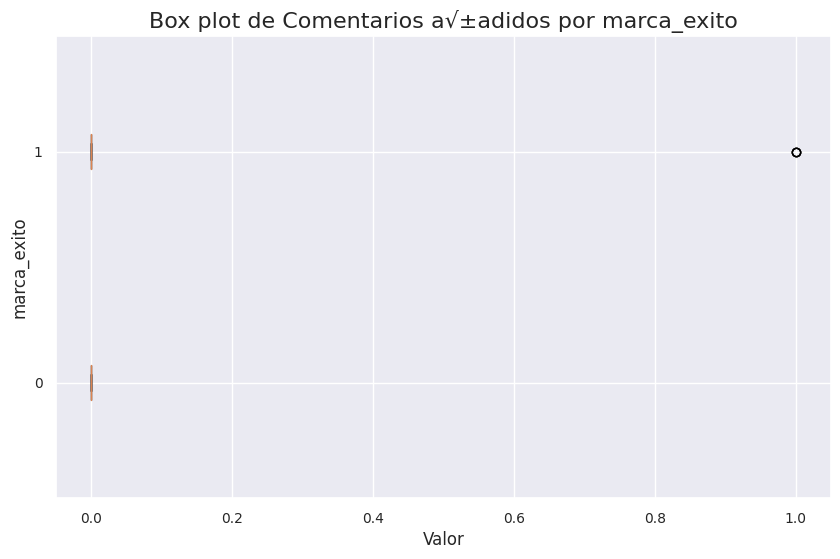

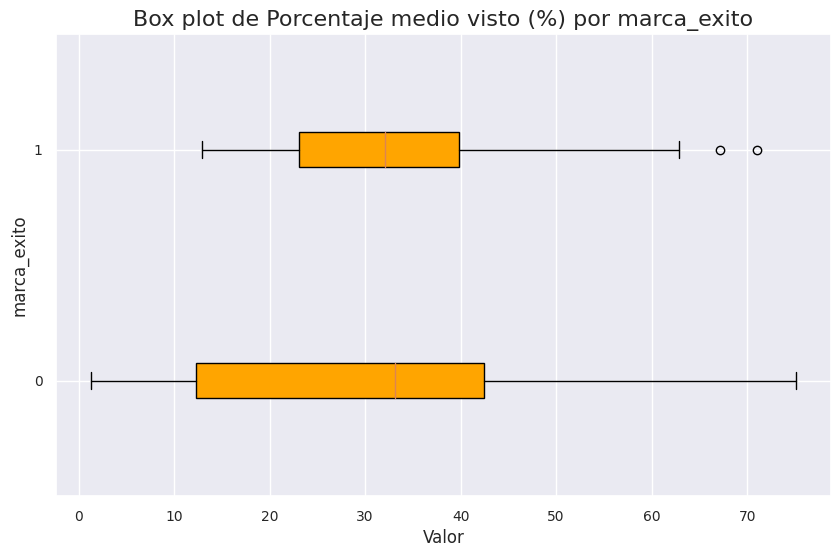

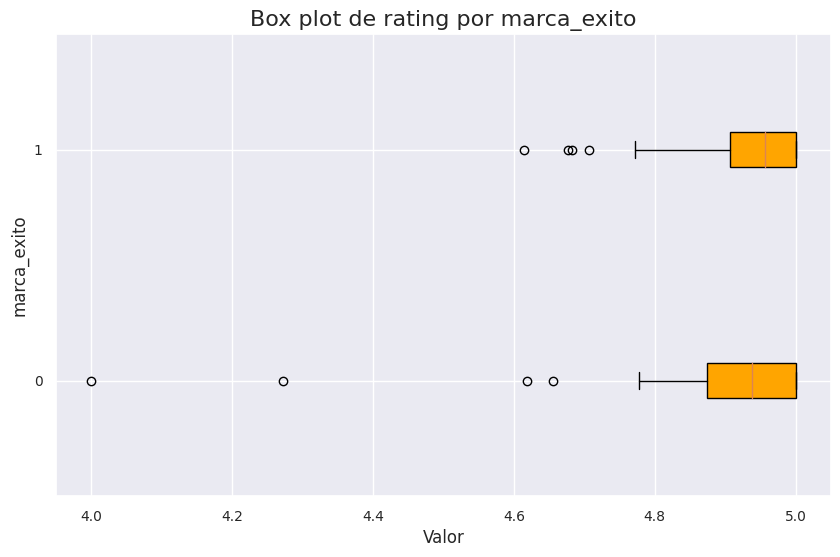

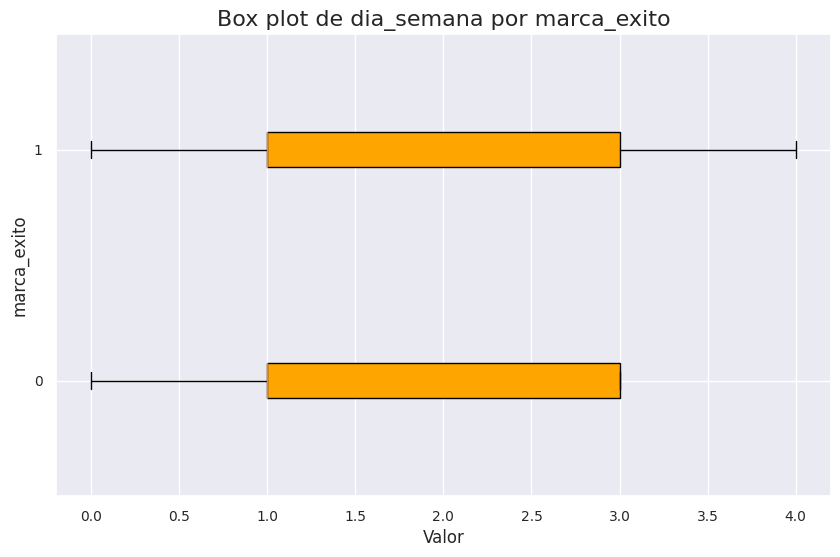

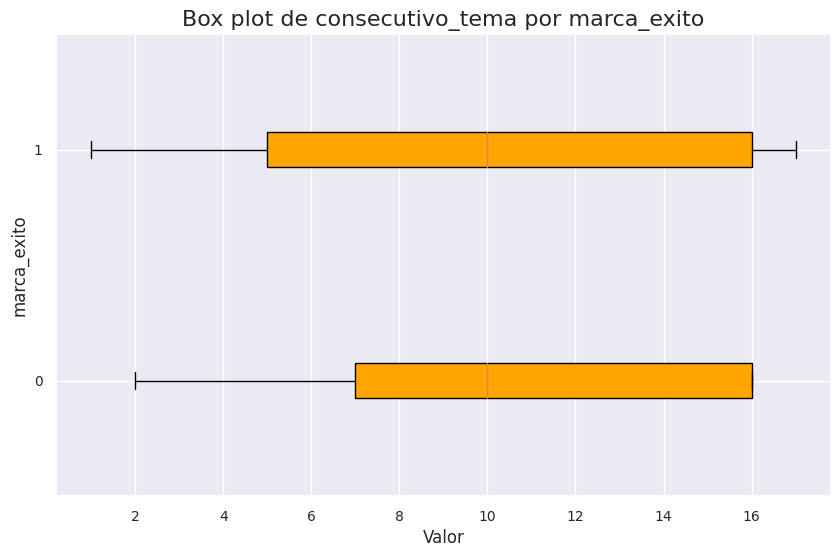

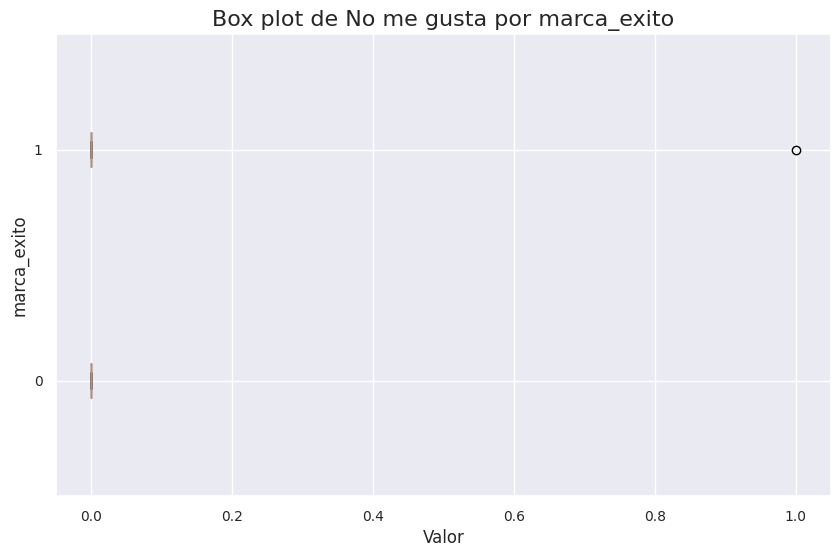

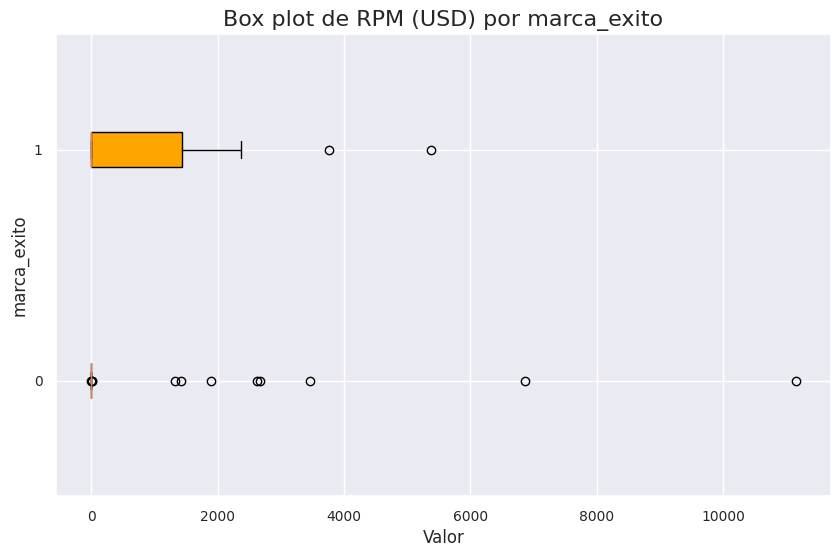

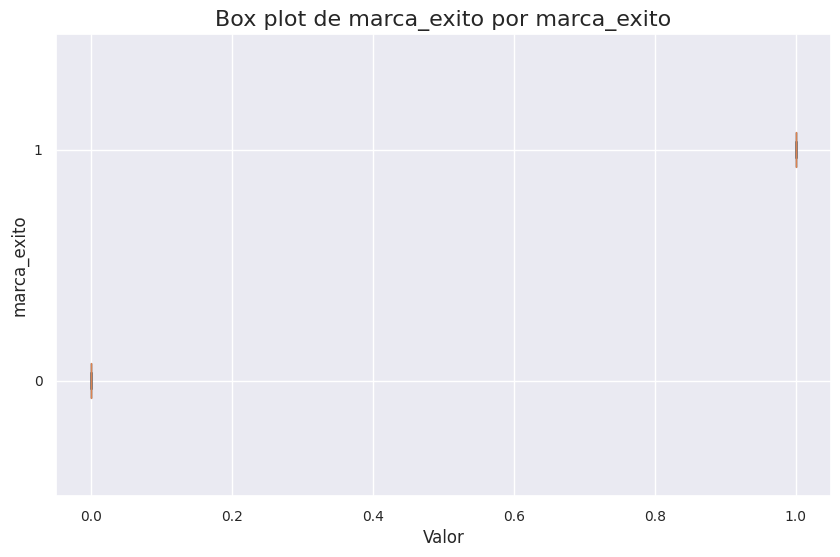

In [13]:
# Agrupar los datos por 'marca_exito'
groups = df.groupby('marca_exito')

# Generar box plots horizontales para cada variable
for column in df.columns:
    plt.figure(figsize=(10, 6), facecolor='white')  # Tamaño de la figura
    boxprops = {'facecolor': 'orange'}  # Color naranja para las cajas
    # Generar los box plots horizontales para cada grupo
    plt.boxplot([group[column] for _, group in groups], vert=False, patch_artist=True, boxprops=boxprops)
    plt.title(f'Box plot de {column} por marca_exito', fontsize=16)  # Título de la figura
    plt.xlabel('Valor', fontsize=12)  # Etiqueta del eje x
    plt.ylabel('marca_exito', fontsize=12)  # Etiqueta del eje y
    plt.yticks(range(1, len(groups) + 1), groups.groups.keys(), fontsize=10)  # Ticks del eje y
    plt.xticks(fontsize=10)  # Tamaño de los ticks del eje x
    plt.show()

In [14]:
# Calcular la correlación de Kendall y Spearman
kendall_corr = df.corr(method='kendall')
spearman_corr = df.corr(method='spearman')

# Trazar las matrices de correlación con Seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

## Correlaciones

In [15]:
# Calcular la correlación de Kendall y Spearman con 'marca_exito'
kendall_corr = df.corrwith(df['marca_exito'], method='kendall')
spearman_corr = df.corrwith(df['marca_exito'], method='spearman')

# Crear una tabla con los resultados
correlation_table = pd.DataFrame({'Kendall': kendall_corr, 'Spearman': spearman_corr})
correlation_table = correlation_table.drop('marca_exito')  # Eliminar la fila 'marca_exito'

# Ordenar los resultados de mayor a menor
correlation_table_sorted = correlation_table.sort_values(by=['Kendall', 'Spearman'], ascending=False)

# Mostrar la tabla de correlaciones ordenada
print(correlation_table_sorted)

                                             Kendall  Spearman
Porcentaje de clics de las impresiones (%)  0.708683  0.861813
Tiempo de visualizaci√≥n (horas)            0.427692  0.521215
Suscriptores ganados                        0.370520  0.375251
Clics en elementos de pantalla final        0.299716  0.303158
RPM (USD)                                   0.279914  0.337213
suscriptores                                0.262983  0.316098
Tarjetas mostradas                          0.252567  0.253575
Me gusta                                    0.227996  0.238015
Comentarios a√±adidos                       0.194424  0.194424
Clics en teaser de tarjeta                  0.157935  0.157935
No me gusta                                 0.111111  0.111111
Densidad_Publicitaria                       0.096707  0.115998
Porcentaje medio visto (%)                  0.085424  0.104104
rating                                      0.056304  0.065613
dia_semana                                 -0.002658 -0

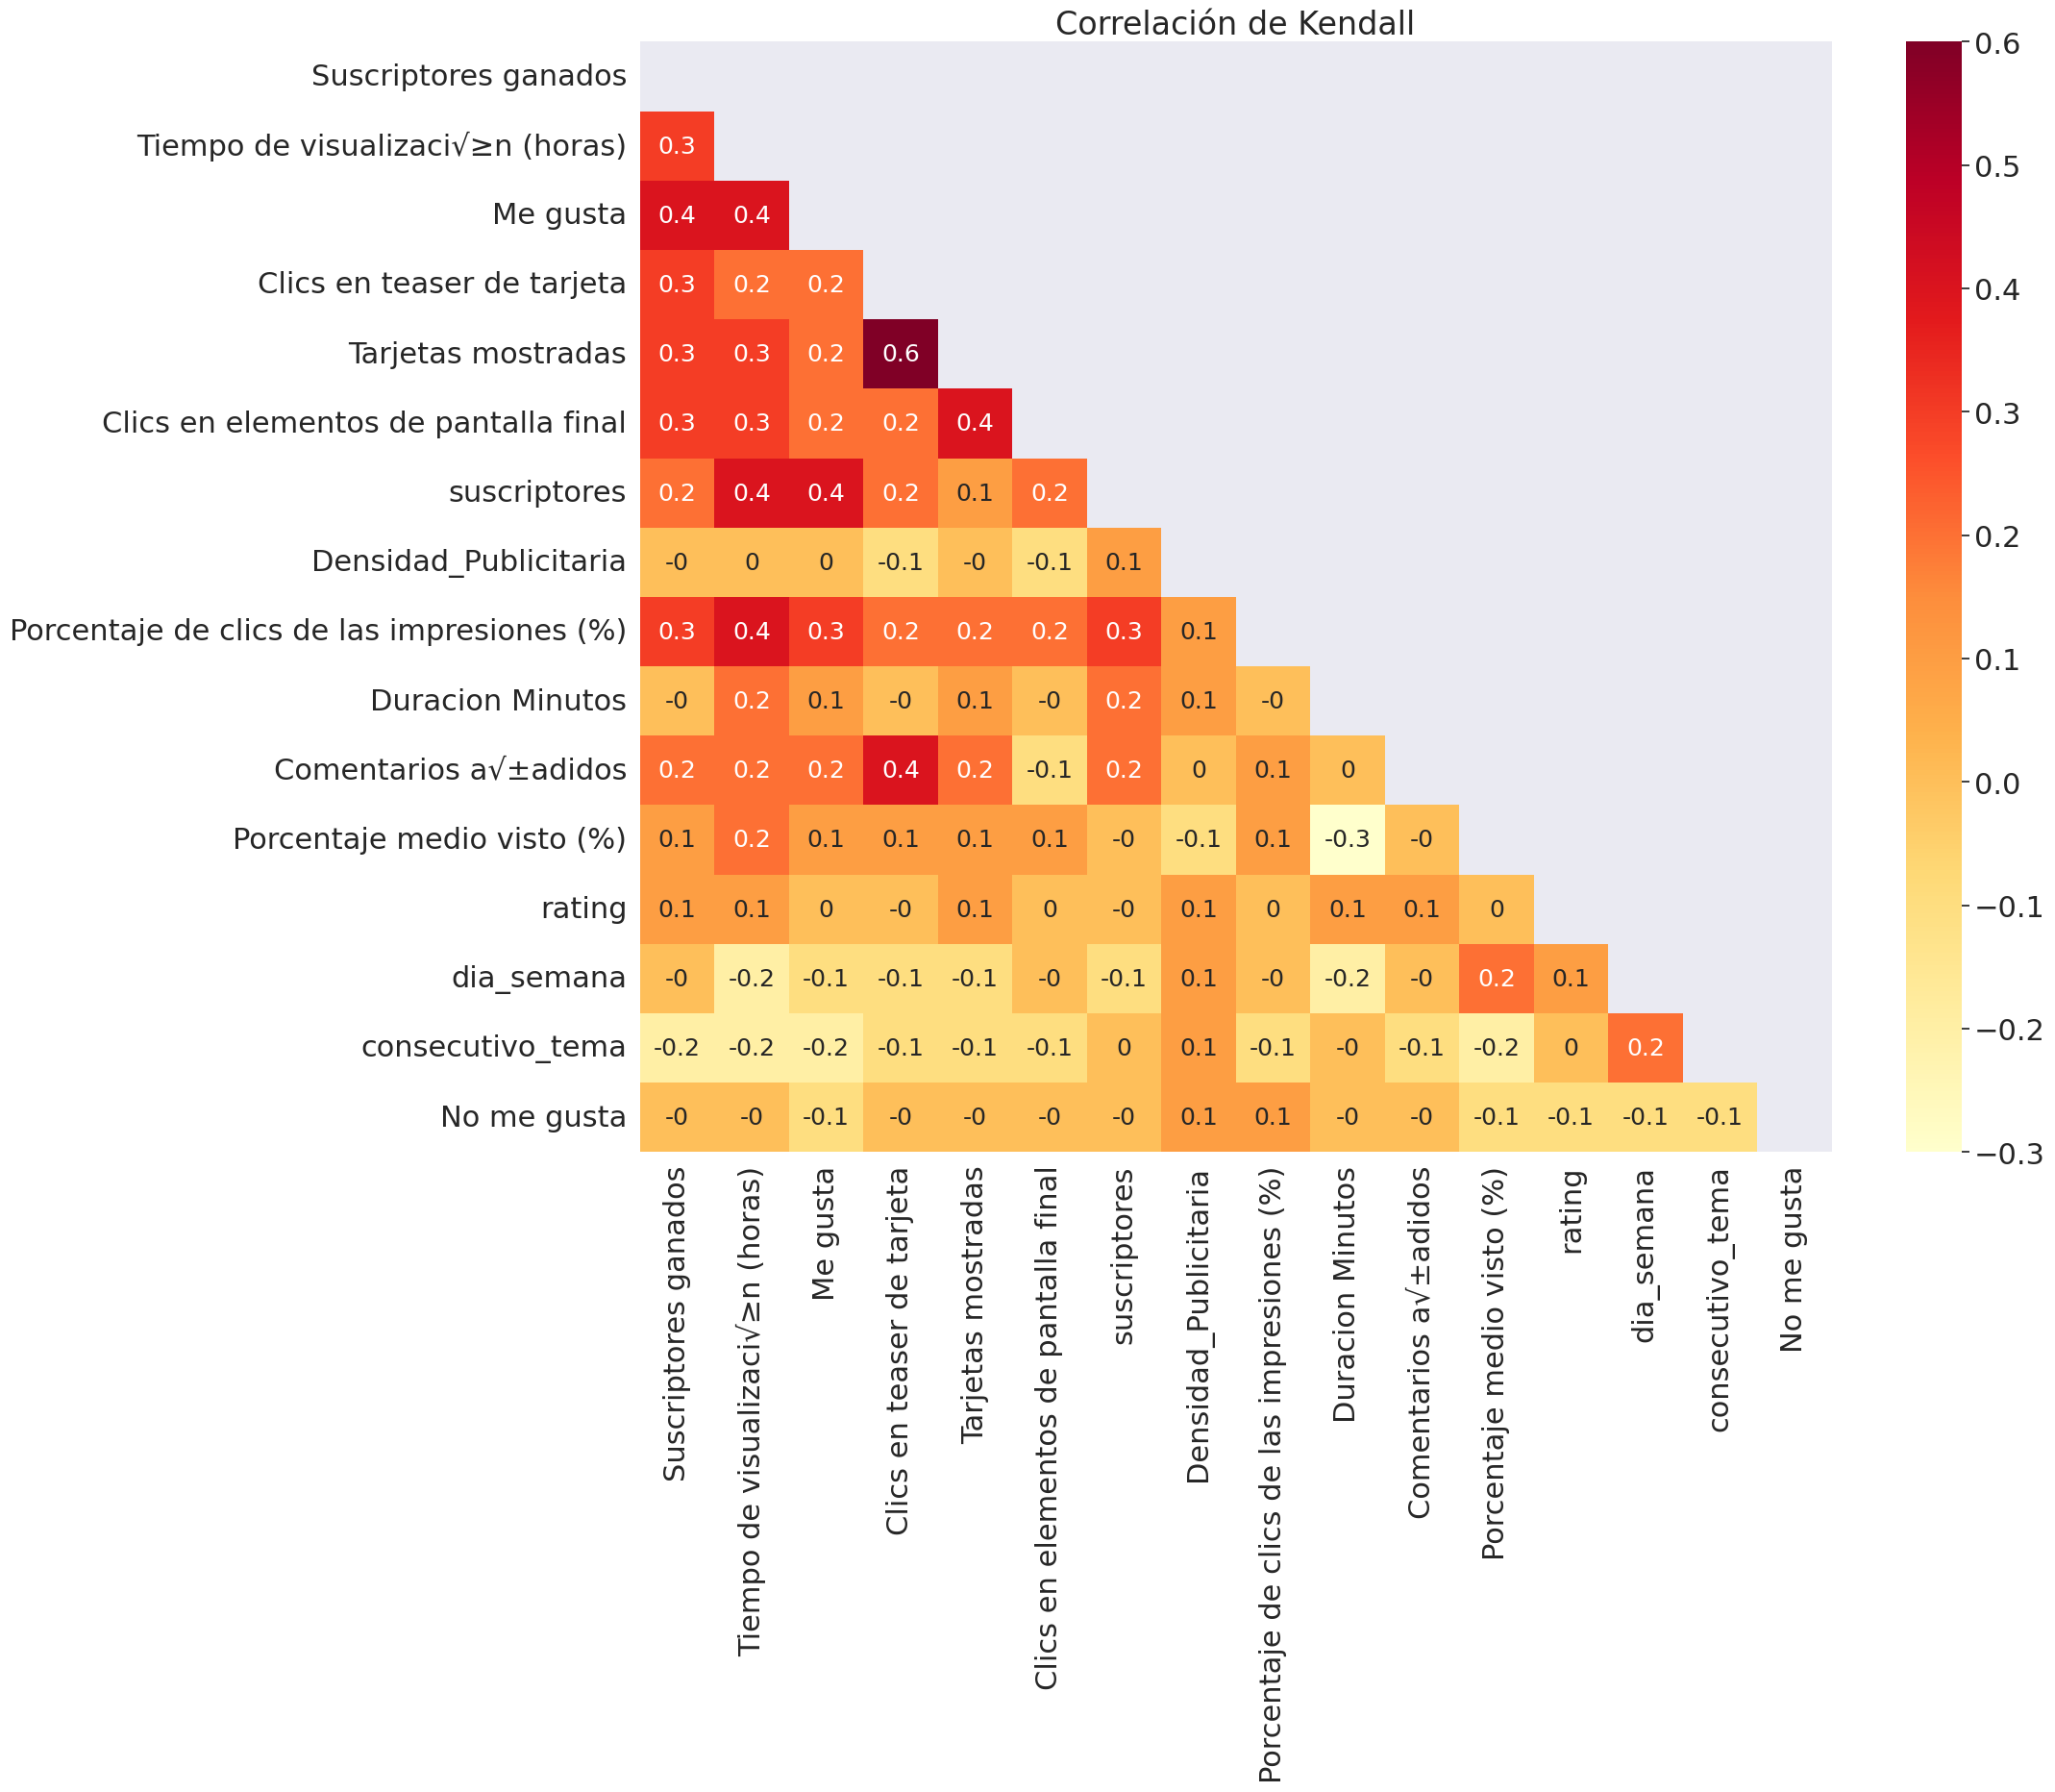

In [18]:
#Correlación de Kendall
plt.figure(figsize = (20,15))
sns.set(font_scale=2)
corr_df = df.drop(['marca_exito','RPM (USD)'], axis=1).corr(method='kendall').round(1)
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='YlOrRd',annot_kws={"size":18}, square = False, mask = mask, alpha = 1)
plt.title('Correlación de Kendall')
plt.show()

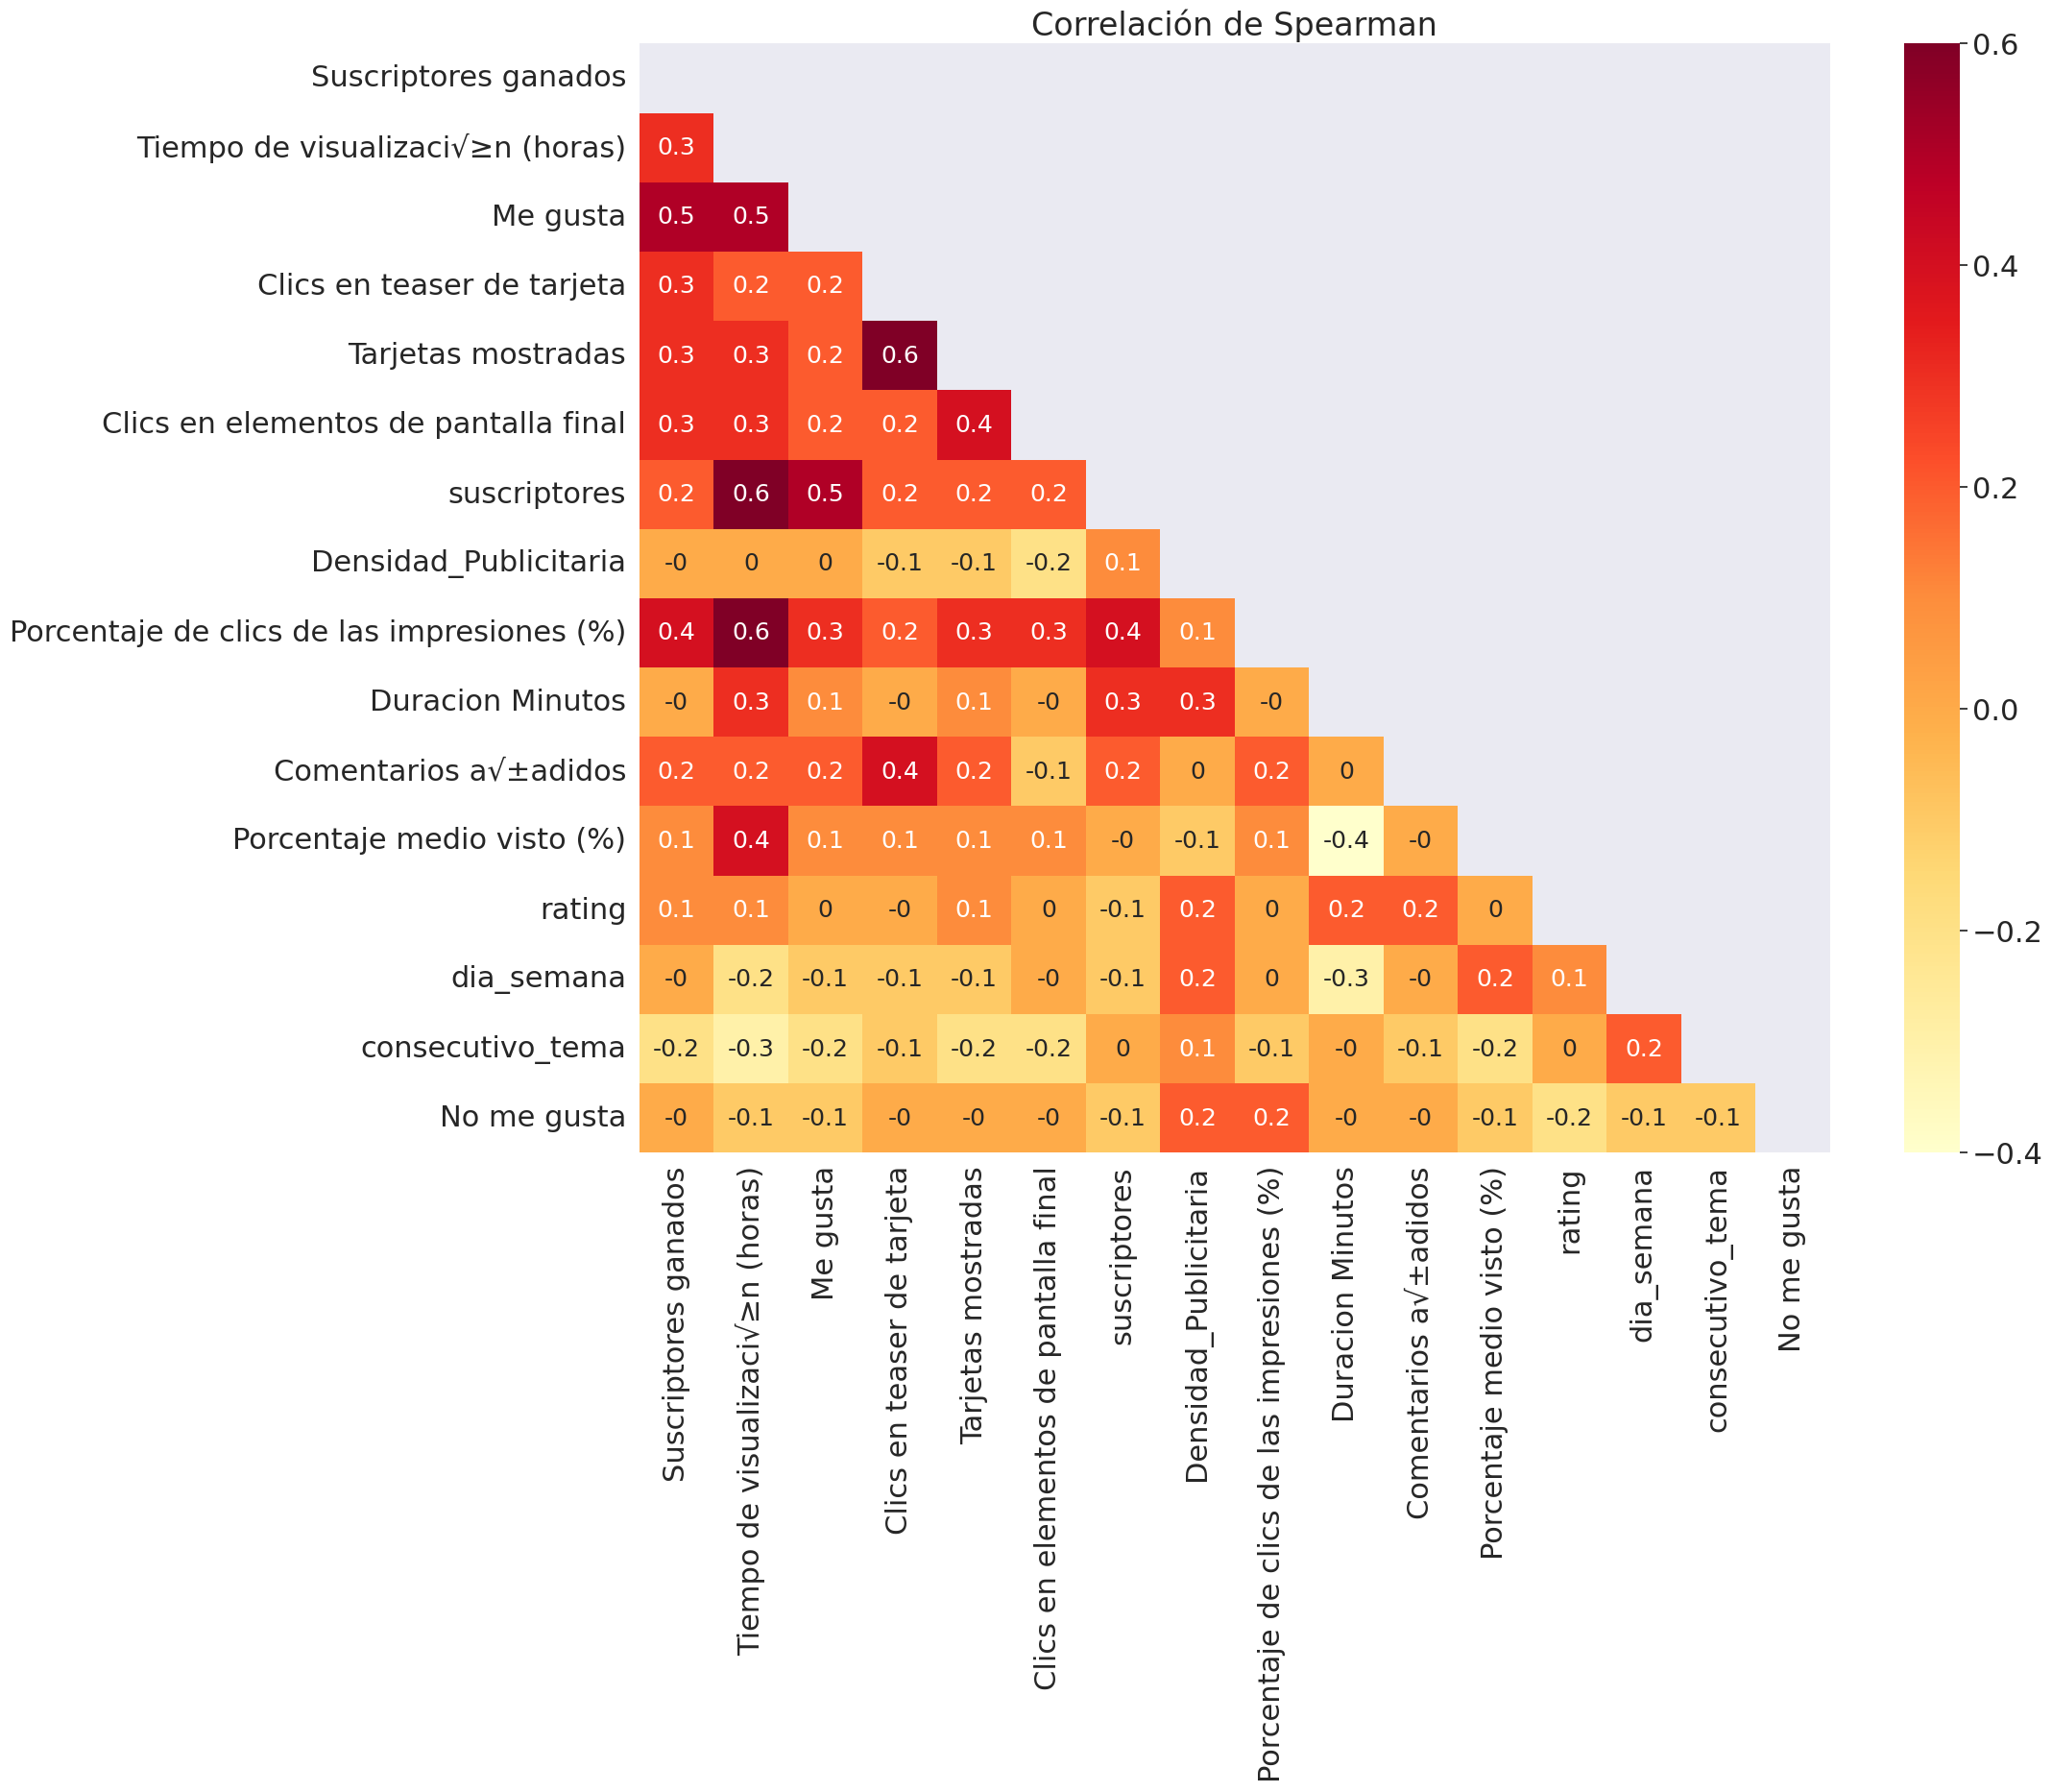

In [19]:
#Correlación de Spearman
plt.figure(figsize = (20,15))
sns.set(font_scale=2)
corr_df = df.drop(['marca_exito','RPM (USD)'], axis=1).corr(method='spearman').round(1)
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='YlOrRd',annot_kws={"size":18}, square = False, mask = mask, alpha = 1)
plt.title('Correlación de Spearman')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af42914d-1d55-41f0-8851-adb5c602e38b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>